# **OULAD DATASET ANALYTIC and IMPELEMNTATION USING MACHINE LEARNING ALGORITHM**

**Nama      : Deva Putra Setya Pratama**

**NIM       : 202010370311212**

**Kelas     : Analisis Big Data C**

**Import Library**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import tensorflow as tf

## **DATASET LOAD**

Membaca OULAD dataset yang terdiri dari 7 buah data yang memiliki fitur dan jumlah data yang berbeda-beda. 

**Membaca dataset menggunakan library pandas**

In [2]:
assessments = pd.read_csv("Dataset/anonymisedData/assessments.csv")
courses = pd.read_csv("Dataset/anonymisedData/courses.csv")
student_assessment = pd.read_csv("Dataset/anonymisedData/studentAssessment.csv")
student_info = pd.read_csv("Dataset/anonymisedData/studentInfo.csv")
student_registration = pd.read_csv("Dataset/anonymisedData/studentRegistration.csv")
student_vle = pd.read_csv("Dataset/anonymisedData/studentVle.csv")
vle = pd.read_csv("Dataset/anonymisedData/vle.csv")

# **EXPLORATORY DATA ANALYS (EDA) + PREPROCESSING DATA PER DATASET**

**ASSESSMENTS**

**Menampilkan data head dan data tail pada dataset assessments**

In [3]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


**Menampilkan jumlah data dan jumlah fitur assessments**

In [4]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
assessments.shape

JUMLAH DATA DAN JUMLAH FITUR :


(206, 6)


-> Jumlah data sebesar 206 baris

-> Jumlah fitur adalah 6 buah

**Menampilkan dataset info dari dataset assessments**

In [5]:
print("INFO DATA :")
assessments.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [6]:
# Melakukan cek jumlah data yang duplikat
duplicate = assessments.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 3 tipe data object dan 3 tipe data numerik

-> Terdapat missing value pada date sebanyak 11 baris (Karena sesuai penjelasan dataset jika informasi tanggal ujian akhir tidak ada, berarti pada akhir minggu presentasi terakhir.)

-> Tidak terdapat duplikasi data

**Menampilkan statistik data assessments**

In [7]:
print("STATISTIK DATA :")
assessments.describe()

STATISTIK DATA :


,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


-> Informasi statistik data pada fitur yang bertipe numerik

Text(0, 0.5, 'Modul')

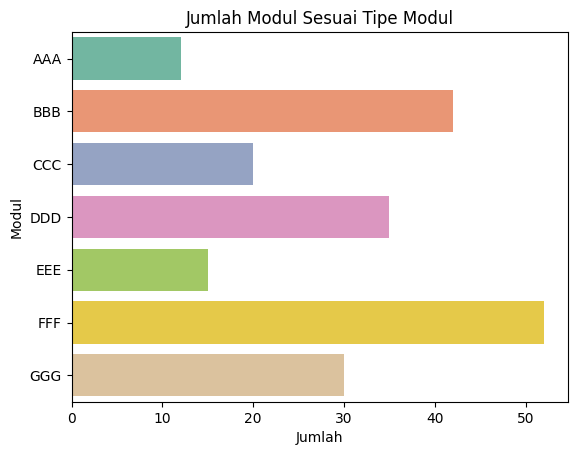

In [8]:
sns.countplot(data=assessments, y='code_module', palette='Set2')

plt.title('Jumlah Modul Sesuai Tipe Modul')
plt.xlabel('Jumlah')
plt.ylabel('Modul')

-> Modul terbanyak adalah modul FFF

-> Modul paling sedikit adalah modul AAA

Text(0, 0.5, 'Modul')

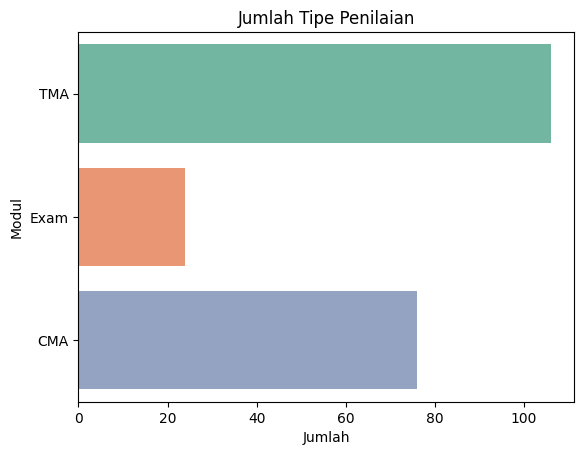

In [9]:
sns.countplot(data=assessments, y='assessment_type', palette='Set2')

plt.title('Jumlah Tipe Penilaian')
plt.xlabel('Jumlah')
plt.ylabel('Modul')

-> Tipe penilaian yang paling banyak adalah TMA

-> Tipe penilaian yang paling sedikit adalah Exam

**Data Correlation**

In [10]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_assessments = assessments.copy()

for column in temp_assessments.columns:
    if temp_assessments[column].dtype == 'object':
        temp_assessments[column] = le.fit_transform(temp_assessments[column])
temp_assessments.dtypes

code_module            int32
code_presentation      int32
id_assessment          int64
assessment_type        int32
date                 float64
weight               float64
dtype: object

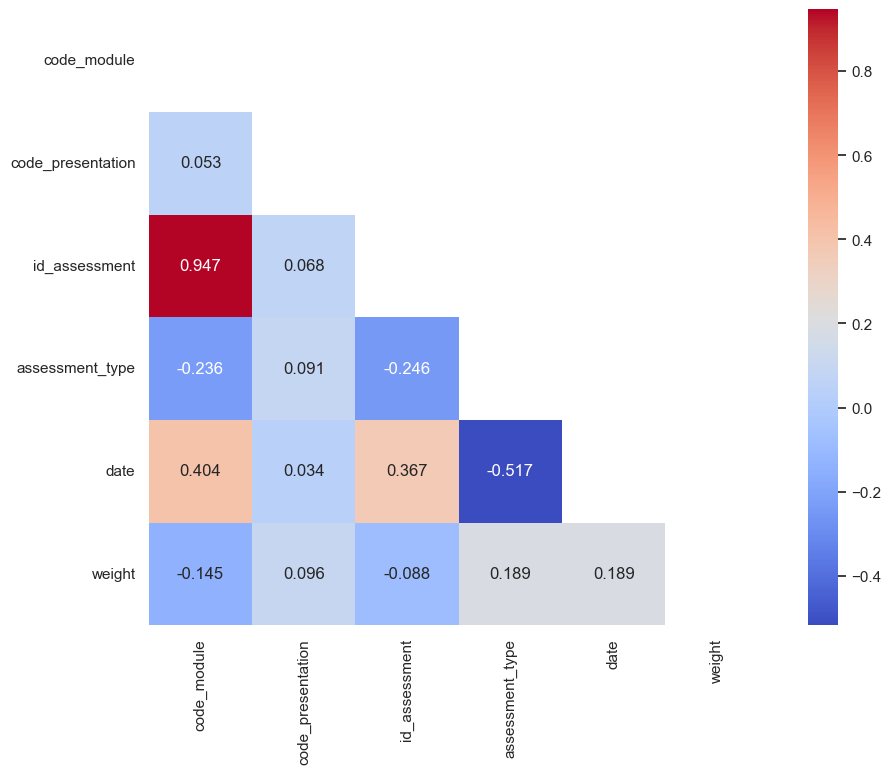

In [11]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_assessments.corr()

# Membuat matriks korelasi tanpa duplikat
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".3f", mask=mask)

# Menampilkan plot
plt.show()

**HANDLING MISSING VALUE**

Poin penting data :

-> Terdapat missing value pada date sebanyak 11 baris (Karena sesuai penjelasan dataset jika informasi tanggal ujian akhir tidak ada, berarti pada akhir minggu presentasi terakhir.)

In [12]:
# Menampilkan tiga buah data yang berkaitan yaitu code_presentasion dan date
assess_filtered = assessments.loc[:, ['code_presentation', 'assessment_type', 'date']]
assess_filtered.head(12)

,code_presentation,assessment_type,date
0,2013J,TMA,19.0
1,2013J,TMA,54.0
2,2013J,TMA,117.0
3,2013J,TMA,166.0
4,2013J,TMA,215.0
5,2013J,Exam,NaN
6,2014J,TMA,19.0
7,2014J,TMA,54.0
8,2014J,TMA,117.0
9,2014J,TMA,166.0


Dari data diatas dapat diketahui bahwa setiap code_representasion yang digunakan memiliki pola date yang sama yaitu 19, 54, 117, 166, dan 215. Dalam perbedaan di atas, terlihat bahwa perbedaan antara angka-angka ini membentuk pola pertambahan konstan, yaitu 35 dan 49. Namun, perbedaan kedua angka terakhir adalah 49, yang sama dengan perbedaan antara dua angka sebelumnya. Ini mungkin menunjukkan pola yang lebih kompleks atau tidak teratur.

Selain itu pada data NaN atau null tersebut selalu memiliki tipe Exam atau ujian akhir. Pada penjelasan dataset assessetmen juga dijelaskan bahwa jika informasi tanggal ujian akhir tidak ada, berarti pada akhir minggu presentasi terakhir.

Oleh karena itu disini akan saya ganti dengan nilai 264, nilai tersebut diperoleh dari dari penjumlahan nilai 215 pada pekan sebelumnya, sehingga 215 ditambah dengan 49 (pola pertambahan 2 angka terakhir) menjadi 264

In [13]:
# Mengubah nilai null menjadi 264
assessments.fillna(264, inplace=True)

In [14]:
# Jumlah null value pada setiap fitur
print(assessments.isnull().sum())

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64


In [15]:
assessments.head(12)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,264.0,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


Hasil -> Data assessments tidak lagi memiliki null value

**COURSES**

**Menampilkan data head dan data tail pada dataset courses**

In [16]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


**Menampilkan jumlah data dan jumlah fitur courses**

In [17]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
courses.shape

JUMLAH DATA DAN JUMLAH FITUR :


(22, 3)


-> Jumlah data sebanyak 22 baris

-> Jumlah fitur adalah 3 buah

**Menampilkan dataset info dari dataset courses**

In [18]:
print("INFO DATA :")
courses.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [19]:
# Melakukan cek jumlah data yang duplikat
duplicate = courses.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 2 tipe data object dan 1 tipe data numerik

-> Tidak terdapat missing value

-> Tidak terdapat duplikasi data

**Menampilkan statistik data courses**

In [20]:
print("STATISTIK DATA :")
courses.describe()

STATISTIK DATA :


,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


-> Informasi statistik data pada fitur yang bertipe numerik

Text(0, 0.5, 'Modul')

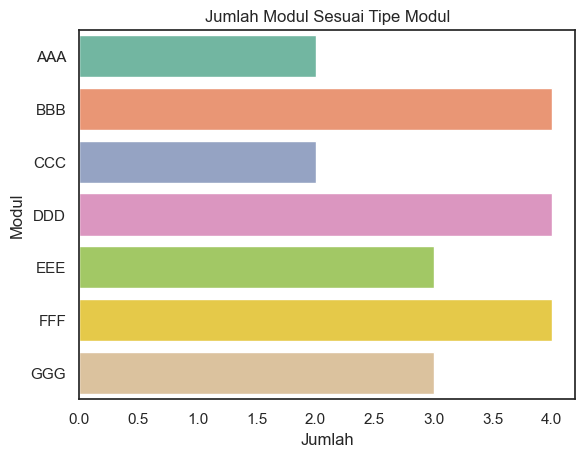

In [21]:
sns.countplot(data=courses, y='code_module', palette='Set2')

plt.title('Jumlah Modul Sesuai Tipe Modul')
plt.xlabel('Jumlah')
plt.ylabel('Modul')

Text(0, 0.5, 'Kurikulum')

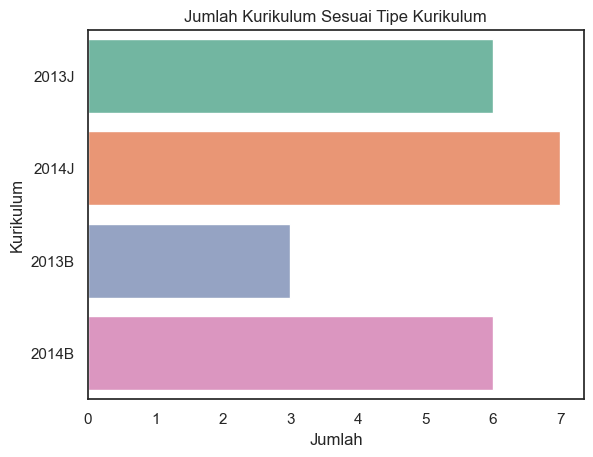

In [22]:
sns.countplot(data=courses, y='code_presentation', palette='Set2')

plt.title('Jumlah Kurikulum Sesuai Tipe Kurikulum')
plt.xlabel('Jumlah')
plt.ylabel('Kurikulum')

Text(0, 0.5, 'Kurikulum')

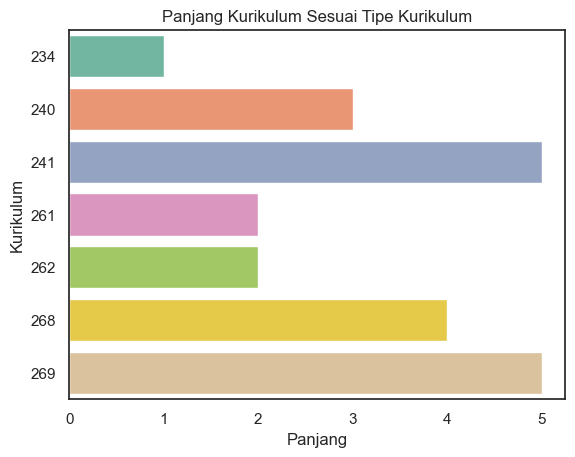

In [23]:
sns.countplot(data=courses, y='module_presentation_length', palette='Set2')

plt.title('Panjang Kurikulum Sesuai Tipe Kurikulum')
plt.xlabel('Panjang')
plt.ylabel('Kurikulum')

**Data Correlation**

In [24]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_courses = courses.copy()

for column in temp_courses.columns:
    if temp_courses[column].dtype == 'object':
        temp_courses[column] = le.fit_transform(temp_courses[column])
temp_courses.dtypes

code_module                   int32
code_presentation             int32
module_presentation_length    int64
dtype: object

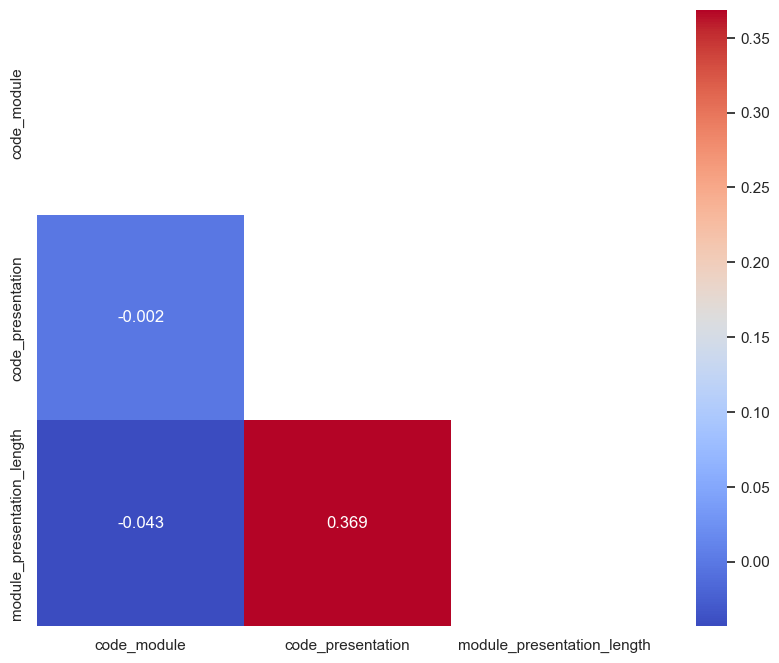

In [25]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_courses.corr()

# Membuat matriks korelasi tanpa duplikat
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".3f", mask=mask)

# Menampilkan plot
plt.show()

**Dari hasil analisis saya, data course data yang sudah bagus dan tidak perlu dilakukan data cleaning**

**STUDENT ASSESSMENT**

**Menampilkan data head dan data tail pada dataset student assessments**

In [26]:
student_assessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


**Menampilkan jumlah data dan jumlah fitur student assessment**

In [27]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
student_assessment.shape

JUMLAH DATA DAN JUMLAH FITUR :


(173912, 5)


-> Jumlah data sebesar 173912 baris

-> Jumlah fitur adalah 5 buah

**Menampilkan dataset info dari dataset student assessments**

In [28]:
print("INFO DATA :")
student_assessment.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [29]:
# Melakukan cek jumlah data yang duplikat
duplicate = student_assessment.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 5 tipe data numerik

-> Terdapat **missing** value pada fitur score sebanyak 173 baris

-> Tidak terdapat duplikasi data

**Menampilkan statistik data student assessment**

In [30]:
print("STATISTIK DATA :")
student_assessment.describe()

STATISTIK DATA :


,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


-> Informasi statistik data pada fitur yang bertipe numerik

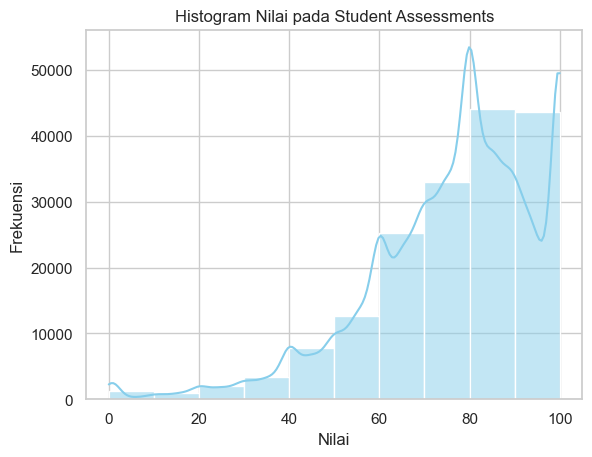

In [31]:
sns.set(style='whitegrid')

sns.histplot(data=student_assessment, x='score', bins=10, kde=True, color='skyblue')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Nilai pada Student Assessments')
plt.show()

**Data Correlation**

In [32]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_stustudent_assessment =student_assessment.copy()

for column in temp_stustudent_assessment.columns:
    if temp_stustudent_assessment[column].dtype == 'object':
        temp_stustudent_assessment[column] = le.fit_transform(temp_stustudent_assessment[column])
temp_stustudent_assessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

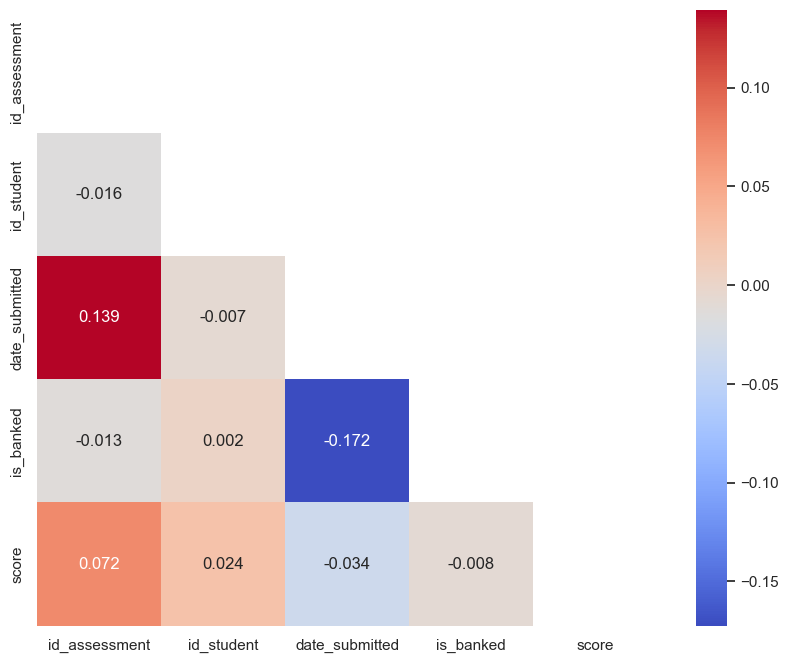

In [33]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_stustudent_assessment.corr()

# Membuat matriks korelasi tanpa duplikat
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".3f", mask=mask)

# Menampilkan plot
plt.show()

**HANDLING MISSING VALUE**

Poin penting data :

-> Terdapat **missing** value pada fitur score sebanyak 173 baris

Hal yang akan dilakukan adalah mengisi null value pada fitur score dengan rata-rata score seluruh mahasiswa

In [34]:
# Menampilkan rata-rata Score
np.mean(student_assessment['score'])

75.7995729226023

In [35]:
# Mengganti nilai kosong dengan 75
student_assessment['score'].fillna(75, inplace=True)

In [36]:
print(student_assessment.isnull().sum())
print(student_assessment.shape)

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64
(173912, 5)


**Data hilang atau missing value berhasil untuk diatasi dengan menambahkan nilai kosong dengan rata-rata score**

**STUDENT INFO**

**Menampilkan data head dan data tail pada dataset student info**

In [37]:
student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


**Menampilkan jumlah data dan jumlah fitur student info**

In [38]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
student_info.shape

JUMLAH DATA DAN JUMLAH FITUR :


(32593, 12)


-> Jumlah data sebesar 32593 baris

-> Jumlah fitur adalah 12 buah

**Menampilkan dataset info dari dataset student info**

In [39]:
print("INFO DATA :")
student_info.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [40]:
# Melakukan cek jumlah data yang duplikat
duplicate = student_info.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 9 tipe data object dan 3 tipe data numerik

-> Terdapat missing value pada fitur imd_band sebesar 1111 baris 

-> Tidak terdapat duplikasi data

**Menampilkan statistik data student info**

In [41]:
print("STATISTIK DATA :")
student_info.describe()

STATISTIK DATA :


,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


-> Informasi statistik data pada fitur yang bertipe numerik

Text(0, 0.5, 'Jumlah')

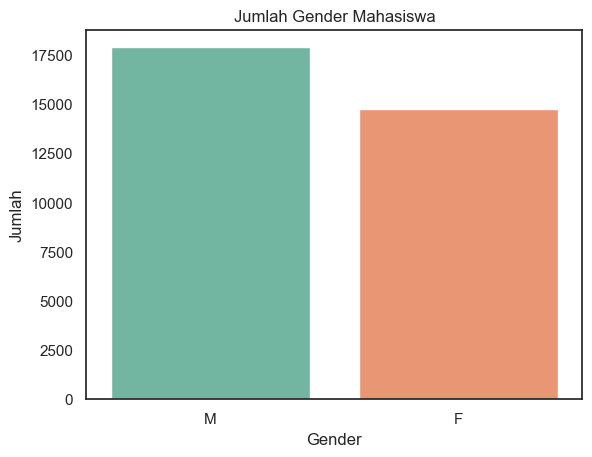

In [42]:
sns.countplot(data=student_info, x='gender', palette='Set2')

plt.title('Jumlah Gender Mahasiswa')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

-> Gender laki-laki lebih banyak daripada perempuan

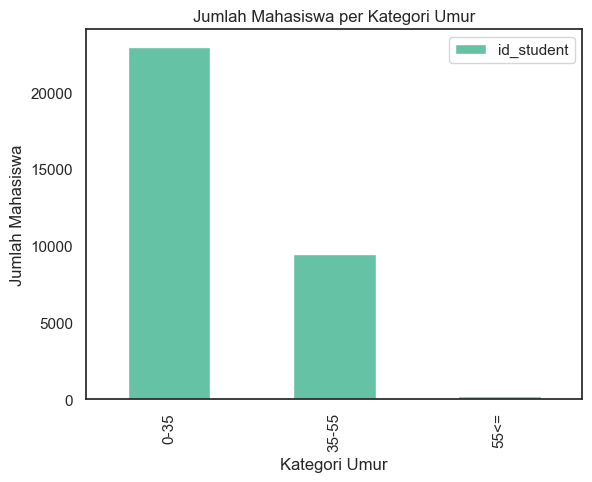

In [43]:
sns.set_palette('Set2')

student_info[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar()

plt.xlabel('Kategori Umur')
plt.ylabel('Jumlah Mahasiswa')

plt.title('Jumlah Mahasiswa per Kategori Umur')

plt.show()

-> Mayoritas didominasi oleh rentang umur dibawah 35 tahun
-> Umur 55 ke atas menjadi rentang umur terkecil

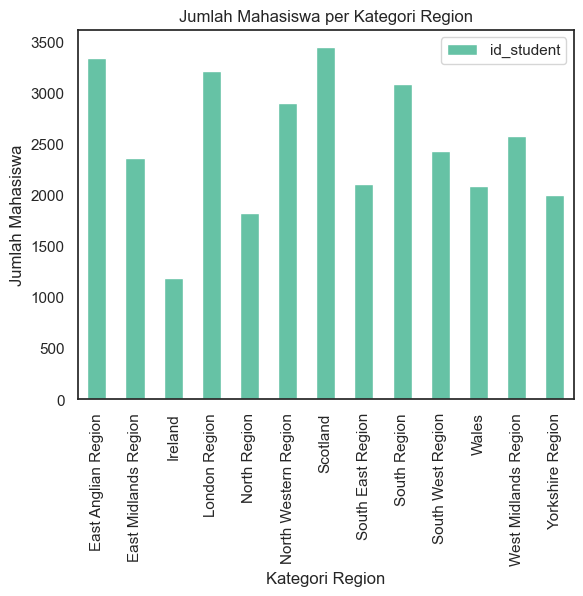

In [44]:
sns.set_palette('Set2')

student_info[['id_student', 'region']].groupby(by='region').count().plot.bar()

plt.xlabel('Kategori Region')
plt.ylabel('Jumlah Mahasiswa')

plt.title('Jumlah Mahasiswa per Kategori Region')

plt.show()

-> Scotland penyumbang mahasiswa terbanyak

-> Ireland penyumbang mahasiswa paling sedikit

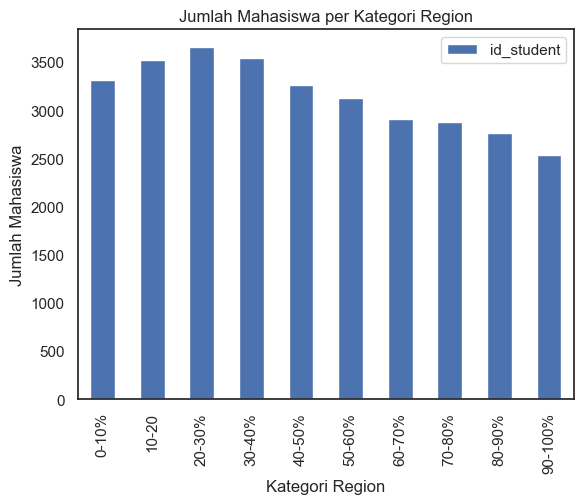

In [45]:
sns.set_palette('deep')

student_info[['id_student', 'imd_band']].groupby(by='imd_band').count().plot.bar()

plt.xlabel('Kategori Region')
plt.ylabel('Jumlah Mahasiswa')

plt.title('Jumlah Mahasiswa per Kategori Region')

plt.show()

Text(0, 0.5, 'Tingkat Pendidikan')

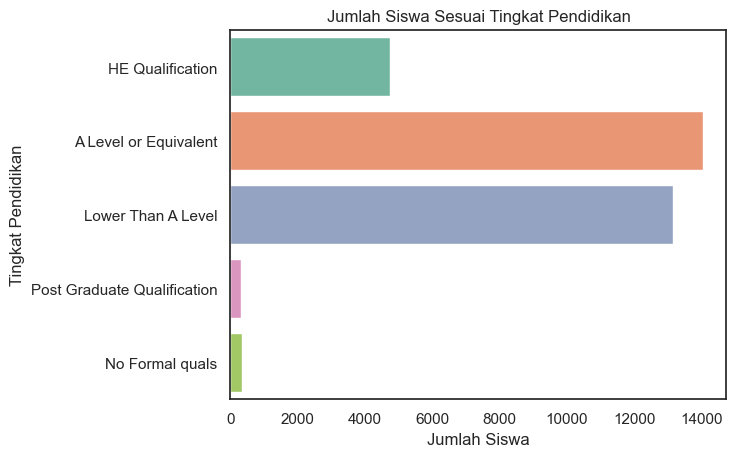

In [46]:
sns.countplot(data=student_info, y='highest_education', palette='Set2')

plt.title('Jumlah Siswa Sesuai Tingkat Pendidikan')
plt.xlabel('Jumlah Siswa')
plt.ylabel('Tingkat Pendidikan')

**Data Correlation**

In [47]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_stustudent_info =student_info.copy()

for column in temp_stustudent_info.columns:
    if temp_stustudent_info[column].dtype == 'object':
        temp_stustudent_info[column] = le.fit_transform(temp_stustudent_info[column])
temp_stustudent_info.dtypes

code_module             int32
code_presentation       int32
id_student              int64
gender                  int32
region                  int32
highest_education       int32
imd_band                int32
age_band                int32
num_of_prev_attempts    int64
studied_credits         int64
disability              int32
final_result            int32
dtype: object

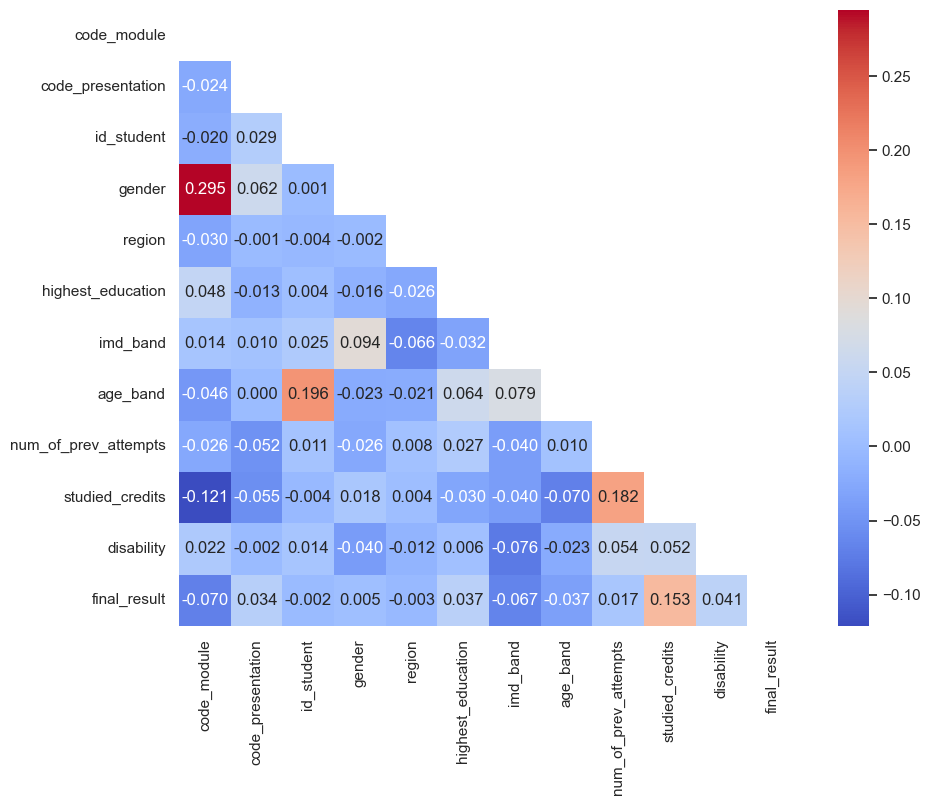

In [48]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_stustudent_info.corr()

# Membuat matriks korelasi tanpa duplikat
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".3f", mask=mask)

# Menampilkan plot
plt.show()

**HANDLING MISSING VALUE**

Poin penting data :

-> Terdapat missing value pada fitur imd_band sebesar 1111 baris 

Terdapat 2 pilihan dalam mengatasi null value pada imd_band, yaitu dengan menghapus seluruh baris NaN atau mengganti nilainya dengan imd_band terendah dengan tujuan data balancing

Disini saya memilih untuk menggnati nilai dengan imd_band terendah, yaitu "90-100%"

In [49]:
# Mengganti null value dengan kategori terendah
student_info['imd_band'].fillna("90-100%", inplace=True)

In [50]:
# Menampilkan null value
print(student_assessment.isnull().sum())

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


In [51]:
# Menampilkan jumlah kategori fitur imd_band
student_info['imd_band'].value_counts()

imd_band
20-30%     3654
90-100%    3647
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
Name: count, dtype: int64

**Data hilang atau missing value berhasil untuk diatasi dengan menambahkan nilai NaN dengan kategori terendah pada fitur imd_band**

**STUDENT REGISTRATION**

**Menampilkan data head dan data tail pada dataset student_registration**

In [52]:
student_registration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


**Menampilkan jumlah data dan jumlah fitur student registration**

In [53]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
student_registration.shape

JUMLAH DATA DAN JUMLAH FITUR :


(32593, 5)

-> Jumlah data sebesar 32593 baris

-> Jumlah fitur adalah 5 buah

**Menampilkan dataset info dari dataset student registration**

In [54]:
print("INFO DATA :")
student_registration.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [55]:
# Melakukan cek jumlah data yang duplikat
duplicate = student_registration.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 2 tipe data object dan 3 tipe data numerik

-> Terdapat missing value pada fitur data_registration sebanyak 45 baris

-> Terdapat missing value pada fitur data_unregistration sebanyak 22521 data 

-> Tidak terdapat duplikasi data

**Menampilkan statistik data student registration**

In [56]:
print("STATISTIK DATA :")
student_registration.describe()

STATISTIK DATA :


,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


-> Informasi statistik data pada fitur yang bertipe numerik

**Data Correlation**

In [57]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_student_registration =student_registration.copy()

for column in temp_student_registration.columns:
    if temp_student_registration[column].dtype == 'object':
        temp_student_registration[column] = le.fit_transform(temp_student_registration[column])
temp_student_registration.dtypes

code_module              int32
code_presentation        int32
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

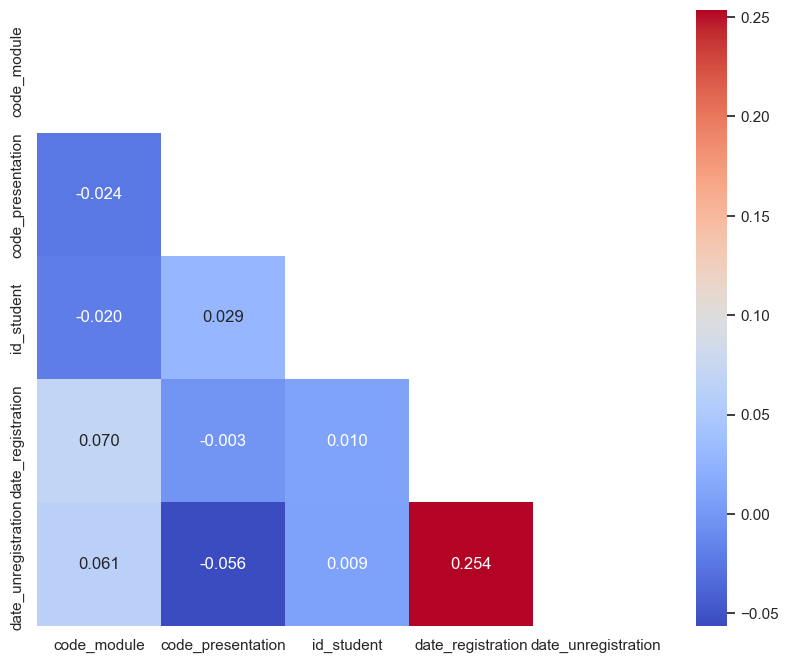

In [58]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_student_registration.corr()

# Membuat matriks korelasi tanpa duplikat
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".3f", mask=mask)

# Menampilkan plot
plt.show()

**HANDLING MISSING VALUE**

Poin penting data :

-> Terdapat missing value pada fitur data_registration sebanyak 45 baris

-> Terdapat missing value pada fitur data_unregistration sebanyak 22521 data 

Untuk mengatasi missing value pada kedua fitur tersebut adalah dengan mengganti null value dengan nilai 0

In [59]:
# Mengganti null value pada fitur date_registration dengan nilai rata-rata fitur, yaitu -69
student_registration['date_registration'] = student_registration['date_registration'].fillna(-69)

In [60]:
# Mengganti null value pada fitur date_registration dengan nilai 0
student_registration['date_unregistration'].fillna(0, inplace=True)

In [61]:
print(student_registration.isnull().sum())

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64


In [62]:
student_registration.shape

(32593, 5)

**Missing value taratasi dan jumlah data tidak berkurang**

**STUDENT VLE**

**Menampilkan data head dan data tail pada dataset student vle**

In [63]:
student_vle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


**Menampilkan jumlah data dan jumlah fitur student vle**

In [64]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
student_vle.shape

JUMLAH DATA DAN JUMLAH FITUR :


(10655280, 6)


-> Jumlah data sebesar 10655280 baris

-> Jumlah fitur adalah 6 buah

**Menampilkan dataset info dari dataset student vle**

In [65]:
print("INFO DATA :")
student_vle.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [66]:
# Melakukan cek value null atau data kosong
print(student_vle.isnull().sum())

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


In [67]:
# Melakukan cek jumlah data yang duplikat
duplicate = student_vle.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 787170


-> Terdapat 3 tipe data object dan 3 tipe data numerik

-> Tidak terdapat missing value

-> Terdapat duplikasi data sebanyak 787170, hal ini terjadi karena adanya banyak data sum_click yang dimiliki 1 mahasiswa dan hasil dari sum_click tersebut kebanyakan sama sehingga terdeteksi duplikat

**Menampilkan statistik data student vle**

In [68]:
print("STATISTIK DATA :")
student_vle.describe()

STATISTIK DATA :


,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


-> Informasi statistik data pada fitur yang bertipe numerik

**Data Correlation**

In [69]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_student_vle = student_vle.copy()

for column in temp_student_vle.columns:
    if temp_student_vle[column].dtype == 'object':
        temp_student_vle[column] = le.fit_transform(temp_student_vle[column])
temp_student_vle.dtypes

code_module          int32
code_presentation    int32
id_student           int64
id_site              int64
date                 int64
sum_click            int64
dtype: object

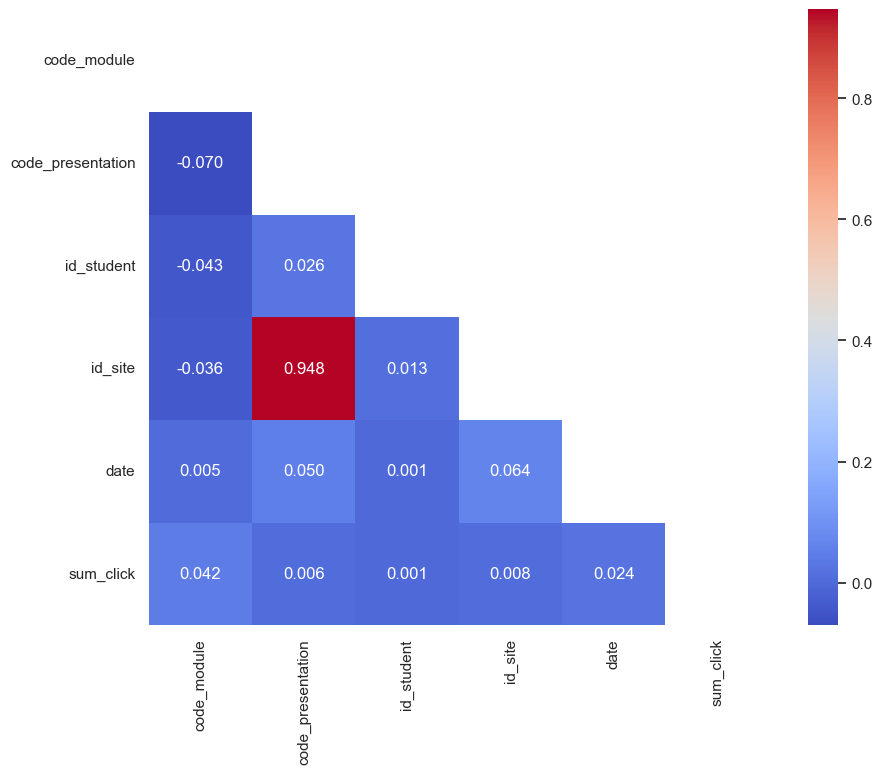

In [70]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_student_vle.corr()

# Membuat matriks korelasi tanpa duplikat
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".3f", mask=mask)

# Menampilkan plot
plt.show()

**VLE**

**Menampilkan data head dan data tail pada dataset vle**

In [71]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


**Menampilkan jumlah data dan jumlah fitur vle**

In [72]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
vle.shape

JUMLAH DATA DAN JUMLAH FITUR :


(6364, 6)


-> Jumlah data sebesar 6364 baris

-> Jumlah fitur adalah 6 buah

**Menampilkan dataset info dari dataset vle**

In [73]:
print("INFO DATA :")
vle.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [74]:
# Melakukan cek jumlah data yang duplikat
duplicate = vle.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 3 tipe data object dan 3 tipe data numerik

-> Terdapat missing value pada fitur week_from sebanyak 5243 baris

-> Terdapat missing value pada fitur week_to sebanyak 5243 baris

-> Tidak terdapat duplikasi data

**Menampilkan statistik data vle**

In [75]:
print("STATISTIK DATA :")
vle.describe()

STATISTIK DATA :


,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


-> Informasi statistik data pada fitur yang bertipe numerik

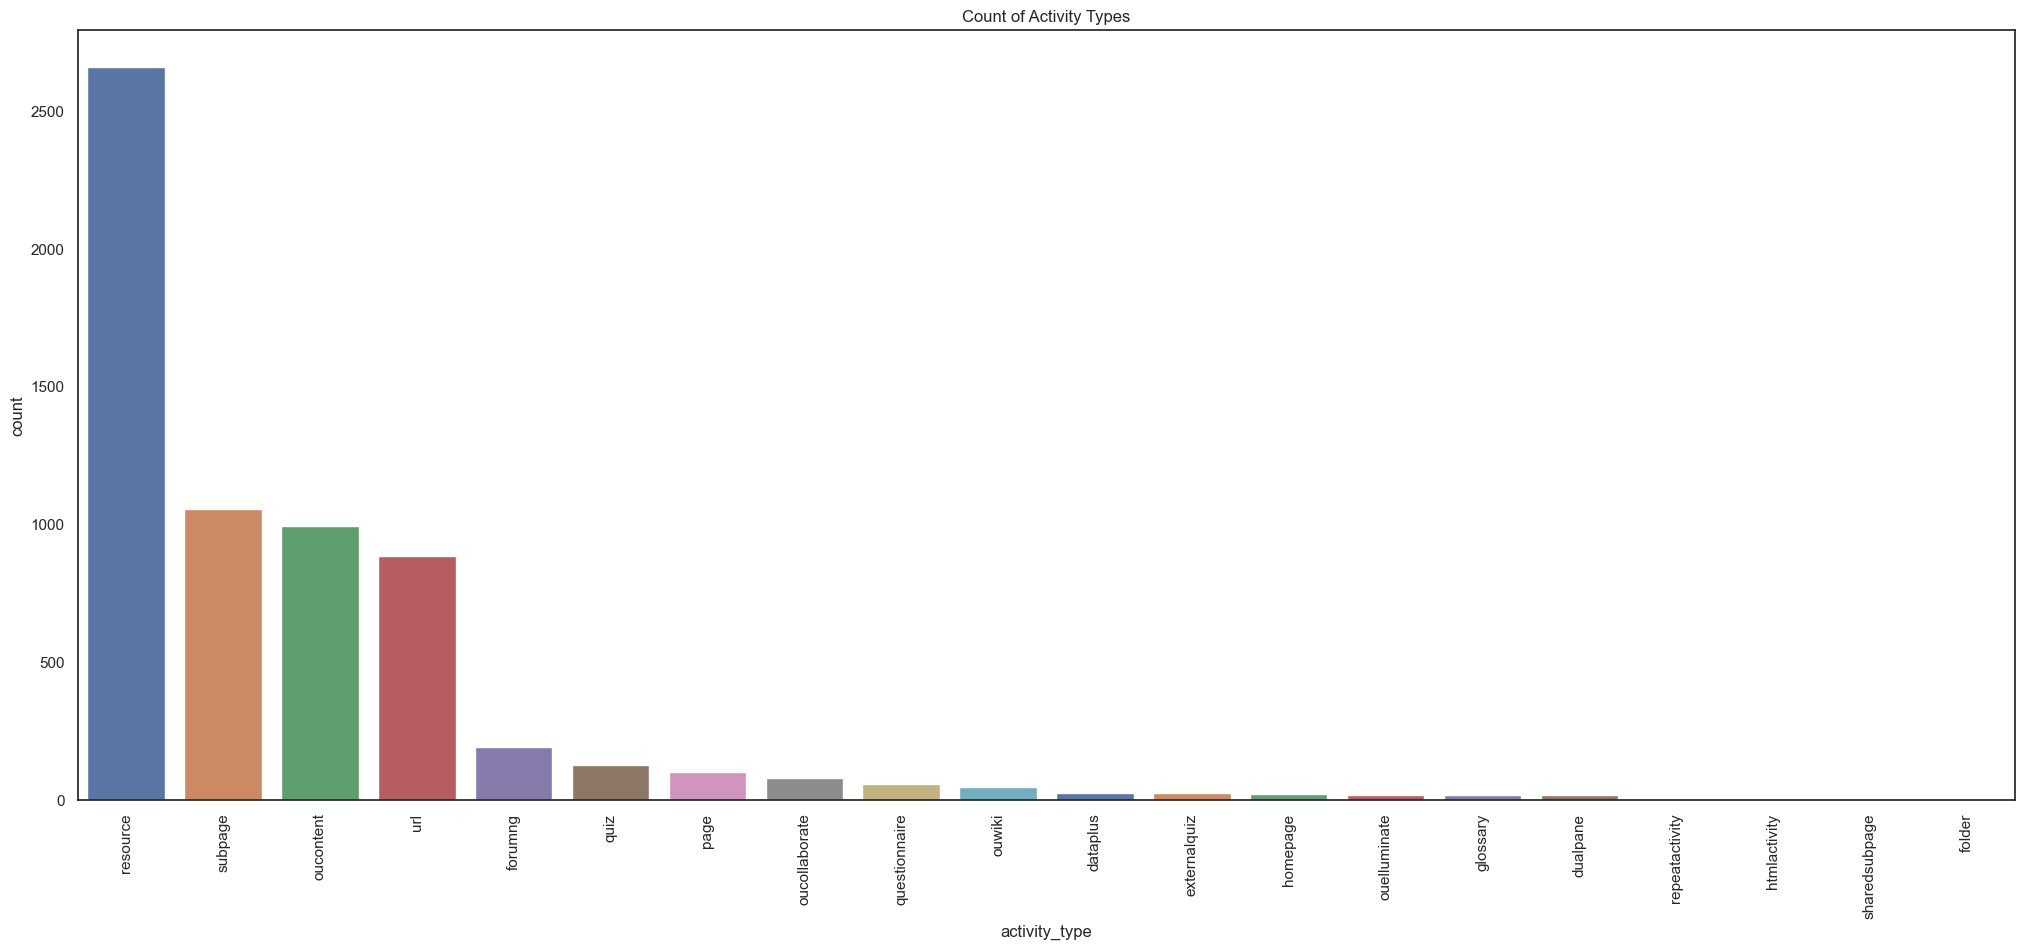

In [76]:
# Menghitung jumlah setiap kategori pada sumbu x
category_counts = vle['activity_type'].value_counts()

# Mengurutkan kategori berdasarkan jumlah
sorted_categories = category_counts.index

# Set ukuran plot
plt.figure(figsize=(25, 10))

# Membuat countplot dengan urutan kategori yang sudah diurutkan
sns.countplot(data=vle, x='activity_type', palette="deep", order=sorted_categories)

# Menambahkan judul
plt.title('Count of Activity Types')

# Menampilkan plot
plt.xticks(rotation=90)  # Putar label sumbu x jika perlu
plt.show()

-> Dari grafik batang tersebut dapat dilihat bahwa aktivitas yang paling banyak pada LMS adalah 'resource'

**Data Correlation**

In [77]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_vle = vle.copy()

for column in temp_vle.columns:
    if temp_vle[column].dtype == 'object':
        temp_vle[column] = le.fit_transform(temp_vle[column])
temp_vle.dtypes

id_site                int64
code_module            int32
code_presentation      int32
activity_type          int32
week_from            float64
week_to              float64
dtype: object

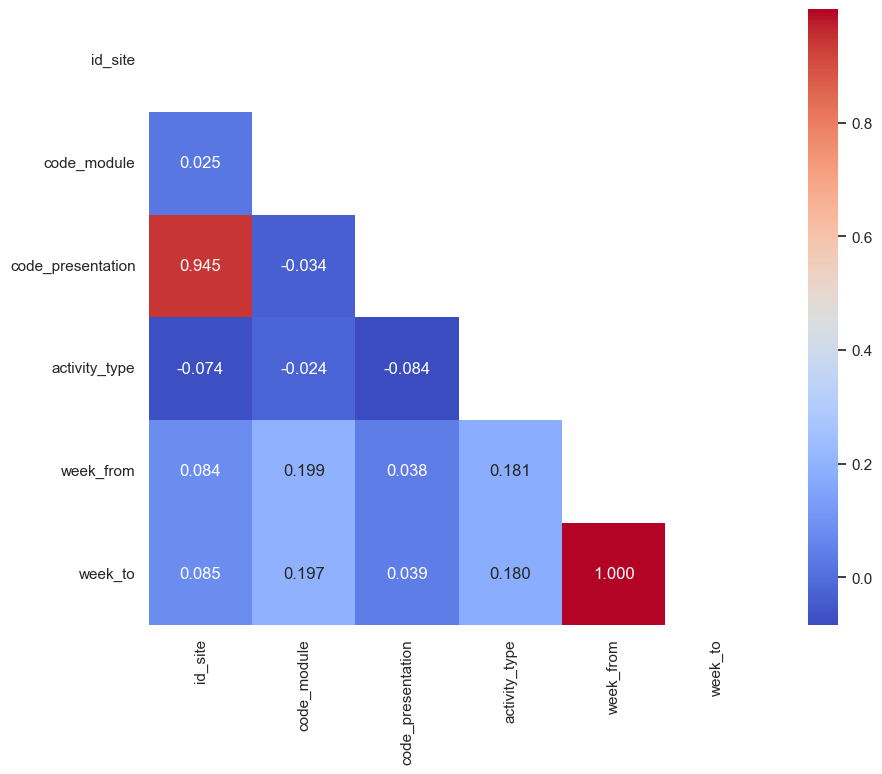

In [78]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_vle.corr()

# Membuat matriks korelasi tanpa duplikat
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".3f", mask=mask)

# Menampilkan plot
plt.show()

**HANDLING MISSING VALUE**

Poin penting data :

-> Terdapat missing value pada fitur week_from sebanyak 5243 baris

-> Terdapat missing value pada fitur week_to sebanyak 5243 baris

Karena fitur week_from dan fitur week_to kemungkinan besar tidak berpengaruh dalam hubungan data maka saya memutuskan untuk melakukan drop kedua fitur tersebut

In [79]:
# Menghapus fitur week_to dan week_from
vle = vle.drop(columns=['week_from'], axis=1)
vle = vle.drop(columns=['week_to'], axis=1)

In [80]:
vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


In [81]:
vle.shape

(6364, 4)

# **DATA INTEGRATION AND FEATURE SELECTION**

Tujuan dari data integrasi yang diterapkan untuk analisis kinerja mahasiswa dari data "student_registration," "course," "student_info," , "vle" dan "student_vle" adalah untuk menggabungkan informasi dari berbagai sumber data agar dapat melakukan analisis yang lebih komprehensif tentang kinerja mahasiswa. Dengan mengintegrasikan data dari berbagai aspek seperti penilaian, informasi mahasiswa, pembelajaran, dan interaksi dengan lingkungan pembelajaran virtual, tujuan utamanya adalah untuk memahami faktor-faktor yang memengaruhi kinerja mahasiswa, mengidentifikasi pola perilaku yang relevan, dan menghasilkan wawasan yang dapat digunakan untuk mendukung pengambilan keputusan yang lebih baik dalam konteks pendidikan.

**Poin penting, saya inmgin menggabungkan seluruh data yang yang ada tapi terjadi memory eror atau keterbatasan memori pada perangkat saya**

In [82]:
student_vle_integration = student_vle.merge(vle, on=['id_site', 'code_module', 'code_presentation'], how = 'left')

In [83]:
student_vle_integration = student_vle_integration.drop('id_site', axis = 1)

In [84]:
student_vle_integration

,code_module,code_presentation,id_student,date,sum_click,activity_type
0,AAA,2013J,28400,-10,4,forumng
1,AAA,2013J,28400,-10,1,forumng
2,AAA,2013J,28400,-10,1,forumng
3,AAA,2013J,28400,-10,11,homepage
4,AAA,2013J,28400,-10,1,oucontent
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,269,3,homepage
10655276,GGG,2014J,675578,269,1,homepage
10655277,GGG,2014J,654064,269,3,homepage
10655278,GGG,2014J,654064,269,1,forumng


In [85]:
final_student = student_info.merge(student_vle_integration, on = ['code_module', 'code_presentation', 'id_student'], how = 'left')

In [86]:
final_student

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click,activity_type
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,16.0,oucontent
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,44.0,oucontent
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,1.0,forumng
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,2.0,oucontent
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,1.0,forumng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10658640,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,205.0,13.0,oucontent
10658641,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,205.0,2.0,oucontent
10658642,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,219.0,1.0,homepage
10658643,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,219.0,31.0,oucontent


In [87]:
student_registration_course_integration = student_registration.merge(courses, 
                                                                      on = ['code_module', 'code_presentation'],
                                                                      how = 'left')

In [ ]:
student_registration_course_integration

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length
0,AAA,2013J,11391,-159.0,0.0,268
1,AAA,2013J,28400,-53.0,0.0,268
2,AAA,2013J,30268,-92.0,12.0,268
3,AAA,2013J,31604,-52.0,0.0,268
4,AAA,2013J,32885,-176.0,0.0,268
...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,0.0,269
32589,GGG,2014J,2645731,-23.0,0.0,269
32590,GGG,2014J,2648187,-129.0,0.0,269
32591,GGG,2014J,2679821,-49.0,101.0,269


In [88]:
final_student = final_student.merge(student_registration_course_integration,
                                 on = ['code_module', 'code_presentation', 'id_student'],
                                 how = 'left')

In [89]:
final_student

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click,activity_type,date_registration,date_unregistration,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,16.0,oucontent,-159.0,0.0,268
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,44.0,oucontent,-159.0,0.0,268
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,1.0,forumng,-159.0,0.0,268
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,2.0,oucontent,-159.0,0.0,268
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,1.0,forumng,-159.0,0.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10658640,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,205.0,13.0,oucontent,-28.0,0.0,269
10658641,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,205.0,2.0,oucontent,-28.0,0.0,269
10658642,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,219.0,1.0,homepage,-28.0,0.0,269
10658643,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,219.0,31.0,oucontent,-28.0,0.0,269


**Melakukan drop pada date_registration karena fitur kurang signifikan**

In [90]:
final_student = final_student.drop(['date_registration'], axis = 1)

In [91]:
final_student

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click,activity_type,date_unregistration,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,16.0,oucontent,0.0,268
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,44.0,oucontent,0.0,268
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,1.0,forumng,0.0,268
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,2.0,oucontent,0.0,268
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,1.0,forumng,0.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10658640,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,205.0,13.0,oucontent,0.0,269
10658641,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,205.0,2.0,oucontent,0.0,269
10658642,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,219.0,1.0,homepage,0.0,269
10658643,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,219.0,31.0,oucontent,0.0,269


**EDA AFTER INTEGRATION DATA**

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23172\371041558.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='activity_type', y='sum_click', data=final_student, estimator='mean', ci=None, order=final_student.groupby(['activity_type'])['sum_click'].mean().sort_values(ascending=False).index, palette="deep")


<Axes: xlabel='activity_type', ylabel='sum_click'>

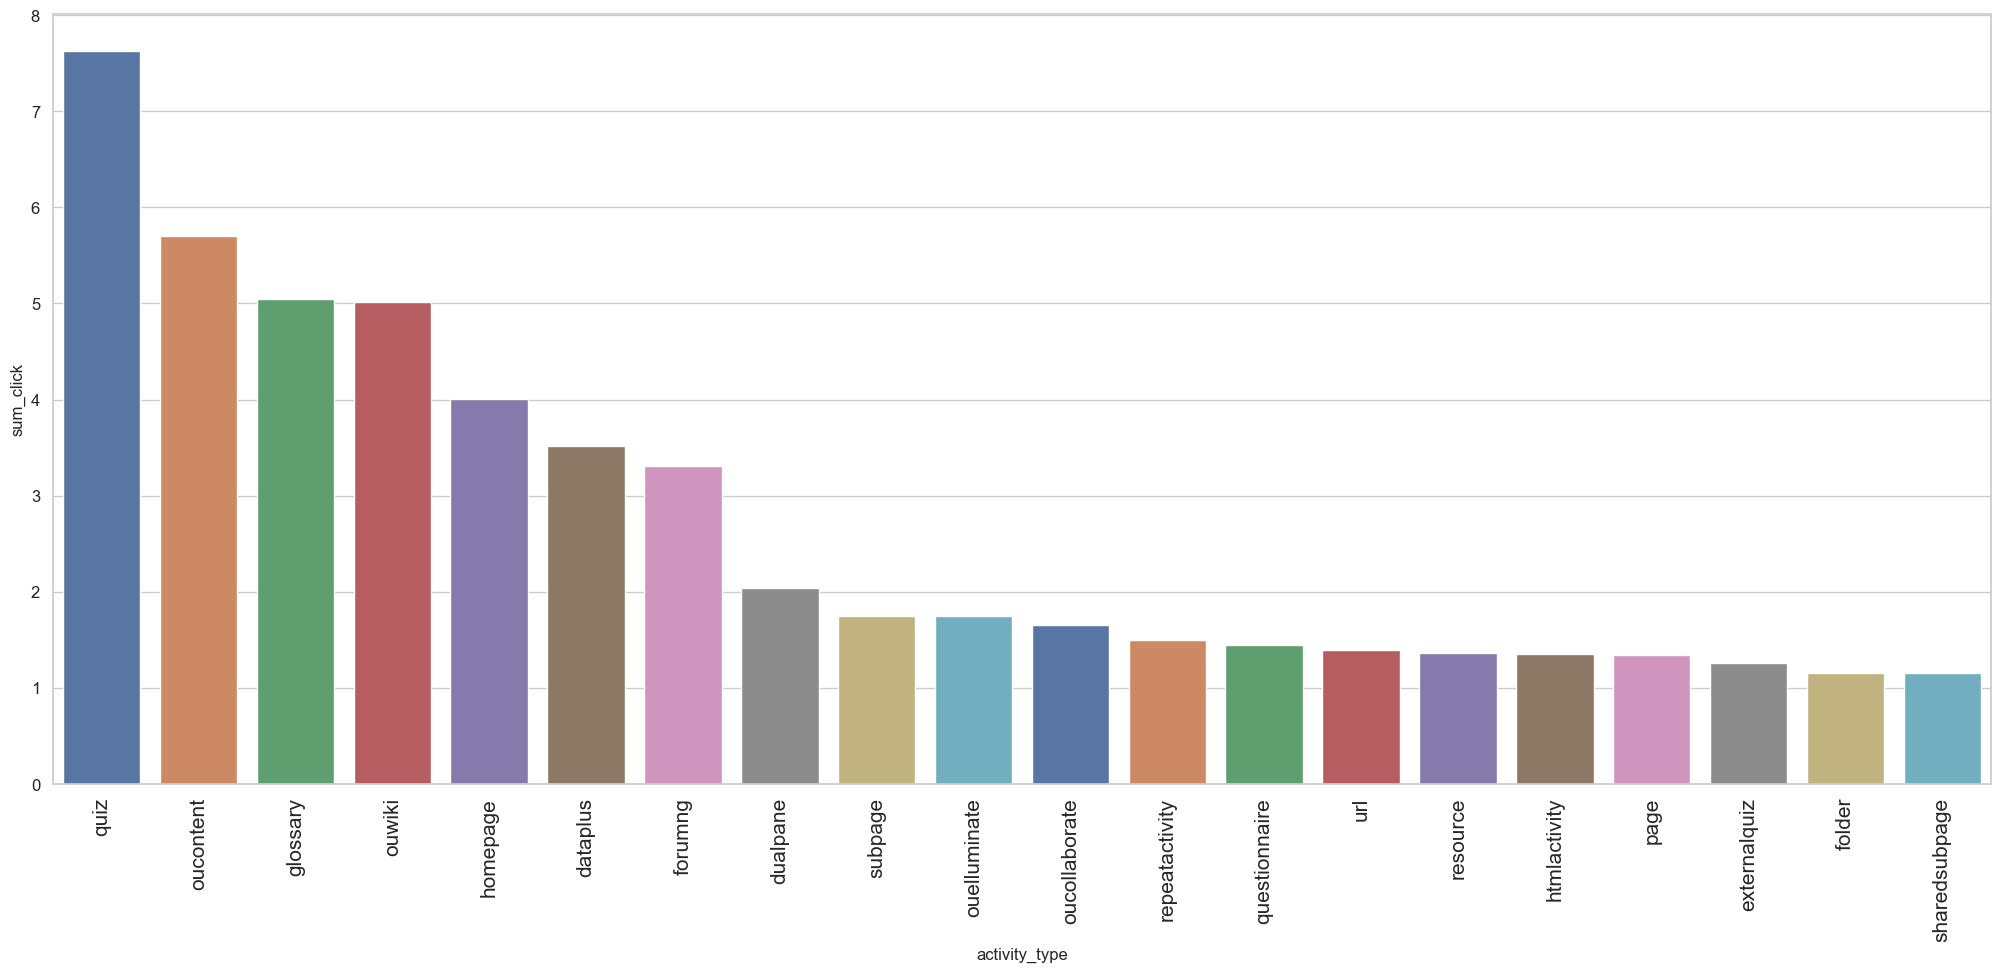

In [ ]:
plt.figure(figsize = (25, 10))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
sns.barplot(x='activity_type', y='sum_click', data=final_student, estimator='mean', ci=None, order=final_student.groupby(['activity_type'])['sum_click'].mean().sort_values(ascending=False).index, palette="deep")


Dari visualisasi barplot antara 'activity type' dan 'sum_click' tersebut bertujuan untuk menjelaskan sejauh mana siswa berpartisipasi dalam berbagai jenis aktivitas dalam lingkungan pembelajaran online atau platform pembelajaran. Dari barplot tersebut diperoleh informasi bahwa :

Dalam plot yang disajikan, terlihat bahwa tingkat interaksi yang tinggi terjadi pada jenis aktivitas "QUIZ." Hal ini dapat dijelaskan oleh kenyataan bahwa siswa cenderung melakukan berbagai tindakan kuis setelah mereka menyelesaikan proses belajar mereka. Kuis menjadi sarana penting untuk menguji pemahaman siswa terhadap materi yang baru saja dipelajari, sehingga tingginya tingkat interaksi dengan aktivitas ini mencerminkan upaya mereka untuk menguji dan memperdalam pengetahuan mereka. Selain itu, analisis plot juga mengungkapkan bahwa aktivitas "OUCONTENT" memiliki tingkat interaksi yang signifikan. Hal ini bisa dimaklumi karena siswa secara konsisten berinteraksi dengan konten dan materi pembelajaran sebagai bagian dari upaya mereka untuk memahami isi materi yang telah diajarkan. Aktivitas ini menjadi inti dari proses pembelajaran, dan tingginya tingkat interaksi menunjukkan betapa pentingnya aspek ini dalam pendidikan online.

Demikian pula, aktivitas "GLOSSARY" juga memperlihatkan tingkat interaksi yang tinggi, mengindikasikan bahwa siswa sering menggunakan glosarium untuk merinci definisi dan memahami istilah-istilah kunci yang ada dalam materi pembelajaran. Glosarium memberikan bantuan penting dalam memastikan pemahaman siswa terhadap materi, memungkinkan mereka untuk memahami dengan lebih baik konsep dan istilah yang mungkin asing. Terakhir, dalam plot, aktivitas "OUWIKI" juga mencerminkan tingkat interaksi yang tinggi. Ini mungkin disebabkan oleh fakta bahwa siswa secara konsisten merujuk ke wiki untuk mendapatkan informasi tambahan, konteks, atau pemahaman lebih mendalam tentang topik tertentu. Aktivitas ini berfungsi sebagai sumber wawasan tambahan yang membantu siswa mendalamkan pemahaman mereka tentang berbagai konsep yang diajarkan dalam pembelajaran online.

final_result             Distinction       Fail       Pass  Withdrawn
code_module code_module                                              
AAA         AAA            12.294789   5.089763  74.299408   8.316039
BBB         BBB            18.295874  12.761951  61.797519   7.144656
CCC         CCC            27.677405  12.222270  46.414401  13.685923
DDD         DDD            13.149483  14.829122  59.953217  12.068179
EEE         EEE            25.216132   8.476711  61.480198   4.826959
FFF         FFF            19.296797  12.297266  60.079289   8.326648
GGG         GGG            25.366537  12.853532  59.179638   2.600293


<Axes: xlabel='code_module,code_module'>

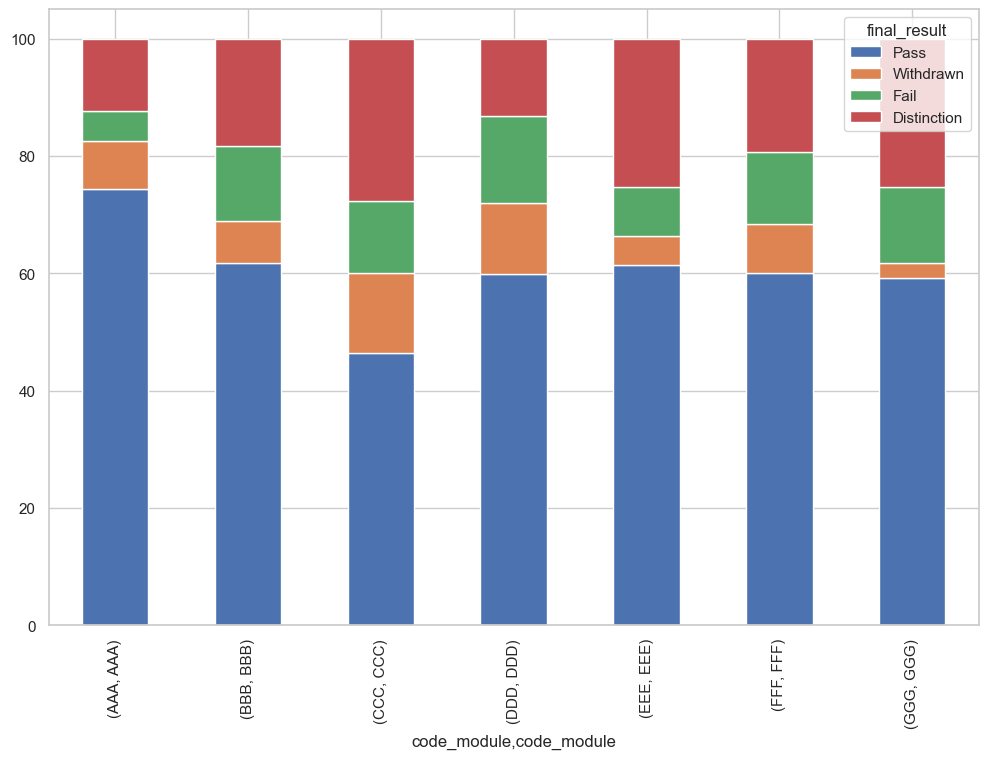

In [ ]:
pal = sns.color_palette("deep")
grouped = final_student.groupby(['code_module', 'final_result'])['id_student'].count()
grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
grouped = grouped.unstack('final_result').fillna(0)
print(grouped)
unique_list = list(final_student['final_result'].unique())
grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=(12, 8))

Dari stacke plot antara 'code_module', 'final_result', dan 'id_student' tersebut bertujuan untuk menampilkan kira-kira modul mana yang susah sehingga banyak mahasiswa yang fail atau withdrawn. Dari stacked bar tersebut didapatkan sebuah informasi bahwa tingkat kegagalan tertinggi berada oada modul BBB, CCC, dan DDD.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23172\2423642706.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='final_result', y='studied_credits', data=final_student, estimator='mean', ci=None, order=final_student.groupby(['final_result'])['studied_credits'].mean().sort_values(ascending=False).index, palette="deep")


<Axes: xlabel='final_result', ylabel='studied_credits'>

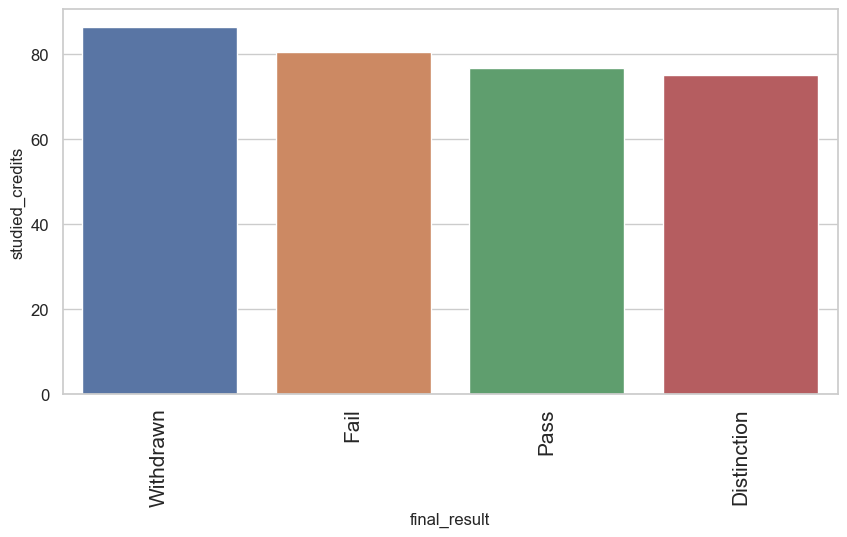

In [ ]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
sns.barplot(x='final_result', y='studied_credits', data=final_student, estimator='mean', ci=None, order=final_student.groupby(['final_result'])['studied_credits'].mean().sort_values(ascending=False).index, palette="deep")

Dari visualisasi barplot antara 'final_result' dan 'studied_credits' tersebut bertujuan untuk menjelaskan jumlah kredit siswa dalam peluang kelulusan. Dari barplot tersebut diperoleh informasi bahwa :

Siswa dengan jumlah kredit yang lebih rendah cenderung memiliki peluang yang lebih besar untuk mencapai predikat "Distinction" atau "Pass" dalam pencapaian akademis mereka, terutama karena jumlah kredit yang lebih rendah mengindikasikan bahwa mereka perlu menghadapi beban kurikulum yang lebih sedikit. Di sisi lain, mereka yang memilih untuk mengundurkan diri dari program studi cenderung menunjukkan rata-rata jumlah kredit yang lebih tinggi dibandingkan dengan rekan-rekan mereka yang berhasil menyelesaikan program. Hal ini bisa menggambarkan bahwa mereka yang mengundurkan diri mungkin menghadapi tantangan tambahan atau memiliki pengalaman yang lebih beragam dalam perjalanan akademik mereka, yang memengaruhi rata-rata jumlah kredit yang diperlukan untuk mencapai tujuan pendidikan tertentu.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23172\797495522.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='imd_band', y='sum_click', data=final_student, estimator='sum', ci=None, order=final_student.groupby(['imd_band'])['sum_click'].mean().sort_values(ascending=True).index, palette="deep")


<Axes: xlabel='imd_band', ylabel='sum_click'>

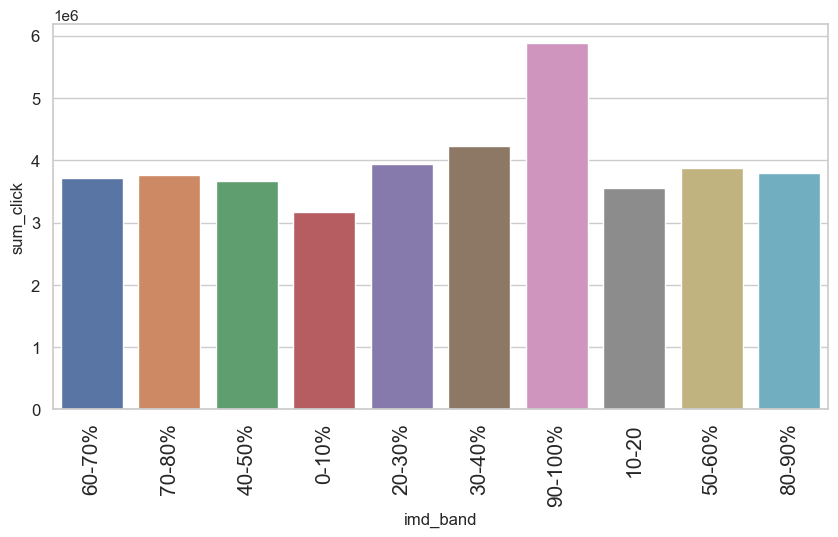

In [ ]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
sns.barplot(x='imd_band', y='sum_click', data=final_student, estimator='sum', ci=None, order=final_student.groupby(['imd_band'])['sum_click'].mean().sort_values(ascending=True).index, palette="deep")

Dari visualisasi barplot antara 'imd_band' dan 'sum_click' tersebut bertujuan untuk menjelaskan jumlah klik siswa sesuai imd_band. Dari barplot tersebut diperoleh informasi bahwa :

Jumlah klik terbanyak teramati pada siswa yang termasuk dalam rentang IMD (Indeks Deprivasi Multifaktor) antara 90-100%, sementara jumlah klik terendah terjadi pada siswa yang berada dalam rentang IMD 0-10%. Hasil ini menunjukkan bahwa siswa yang menghadapi tingkat deprivasi yang lebih rendah cenderung lebih aktif dalam berinteraksi dengan materi pembelajaran atau platform online. Sebaliknya, siswa dalam kelompok IMD yang memiliki tingkat deprivasi lebih tinggi mungkin menghadapi hambatan atau kendala yang mempengaruhi tingkat partisipasi mereka dalam aktivitas pembelajaran online. Analisis ini menyoroti pentingnya memahami pengaruh faktor-faktor sosioekonomi, seperti IMD, terhadap tingkat partisipasi siswa dalam pendidikan online dan menekankan perlunya penyediaan dukungan yang sesuai bagi kelompok yang mungkin menghadapi tantangan tambahan dalam upaya mereka untuk sukses dalam pembelajaran.

final_result       Distinction       Fail       Pass  Withdrawn
age_band age_band                                              
0-35     0-35        17.476380  13.431397  59.768727   9.323496
35-55    35-55       22.418826  10.542904  58.597337   8.440933
55<=     55<=        28.782027   5.894522  57.060255   8.263196


<Axes: xlabel='age_band,age_band'>

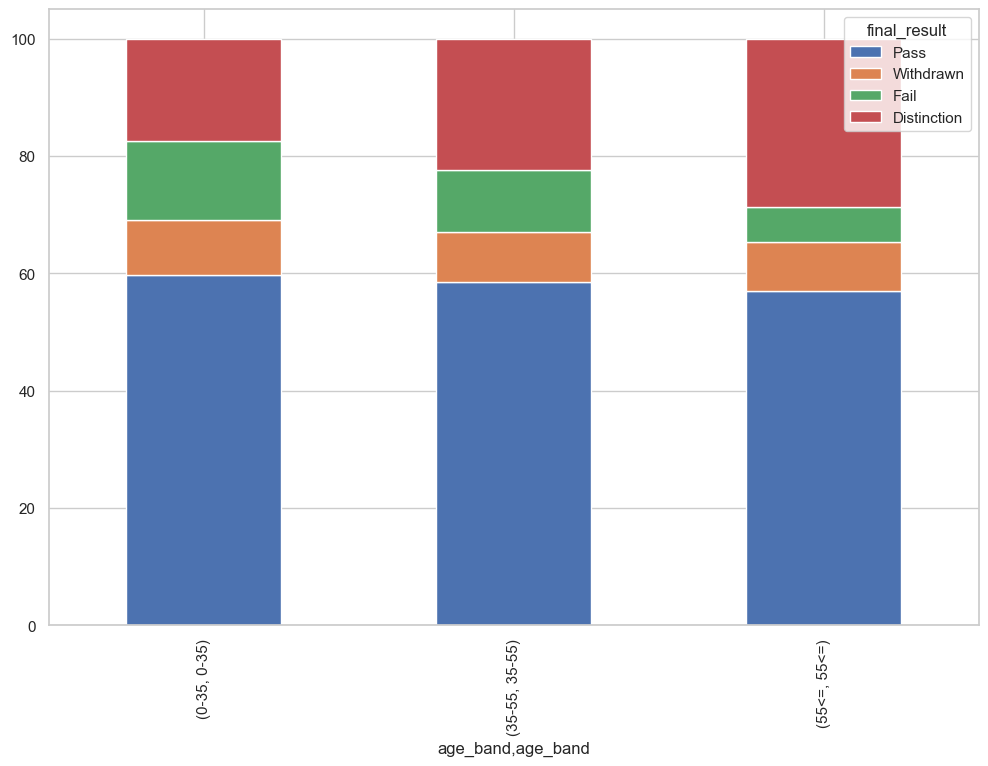

In [ ]:
pal = sns.color_palette("deep")
grouped = final_student.groupby(['age_band', 'final_result'])['id_student'].count()
grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
grouped = grouped.unstack('final_result').fillna(0)
print(grouped)
unique_list = list(final_student['final_result'].unique())
grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=(12, 8))

Dari stacke plot antara 'age_band', 'final_result', dan 'id_student' tersebut bertujuan untuk menampilkan pengaruh umur terhadap kelulusan. Dari stacked plot tersebut didapatkan sebuah informasi bahwa :

Data tersebut memberikan gambaran tentang sebaran jumlah siswa dalam berbagai kategori hasil. Mayoritas data terfokus pada kelompok usia 0-55, sedangkan kelompok usia yang lebih tua (usia >= 55) memiliki kontribusi data yang relatif sedikit. Analisis lebih lanjut mengungkapkan bahwa tingkat kegagalan dan penarikan diri cenderung lebih tinggi terutama di antara siswa yang termasuk dalam kelompok usia 0-35. Hal ini mengindikasikan bahwa kelompok usia yang lebih muda cenderung menghadapi tantangan lebih besar dalam mencapai hasil akademik yang positif, mungkin disebabkan oleh berbagai faktor seperti tingkat kesiapan mereka atau tuntutan akademik yang lebih besar pada kelompok usia ini.

final_result                                             Distinction   
highest_education           highest_education                          
A Level or Equivalent       A Level or Equivalent          21.032926  \
HE Qualification            HE Qualification               27.045620   
Lower Than A Level          Lower Than A Level             12.761488   
No Formal quals             No Formal quals                14.912935   
Post Graduate Qualification Post Graduate Qualification    39.424288   

final_result                                                  Fail       Pass   
highest_education           highest_education                                   
A Level or Equivalent       A Level or Equivalent        10.840185  60.240532  \
HE Qualification            HE Qualification              8.594011  56.930232   
Lower Than A Level          Lower Than A Level           16.184813  59.961416   
No Formal quals             No Formal quals              18.881119  53.041895   
Post Grad

<Axes: xlabel='highest_education,highest_education'>

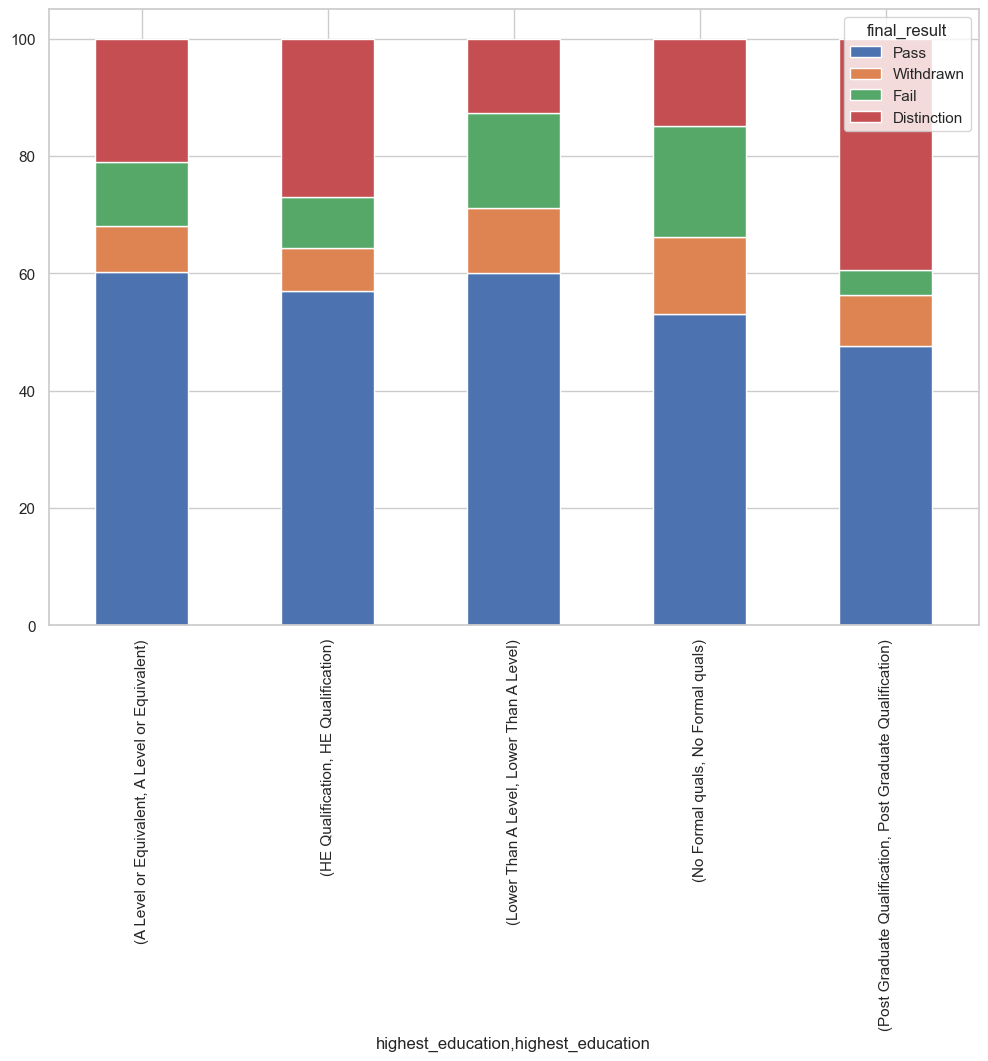

In [ ]:
pal = sns.color_palette("deep")
grouped = final_student.groupby(['highest_education', 'final_result'])['id_student'].count()
grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
grouped = grouped.unstack('final_result').fillna(0)
print(grouped)
unique_list = list(final_student['final_result'].unique())
grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=(12, 8))

Dari stacke plot antara 'highest_education', 'final_result', dan 'id_student' tersebut bertujuan untuk menampilkan pengaruh tingkat pendidikan terhadap kelulusan. Dari stacked plot tersebut didapatkan sebuah informasi bahwa :

Melalui stacked bar tersebut, kita dapat mengidentifikasi bahwa tingkat kegagalan dan tingkat penarikan diri mencapai puncaknya pada dua kelompok, yaitu individu yang tidak memiliki pendidikan formal dan individu yang memiliki tingkat pendidikan di bawah A Level (Lower Than A Level). Sebaliknya, tingkat kegagalan yang terendah terlihat pada individu yang telah mencapai tingkat pendidikan pascasarjana (Post Graduate). Analisis ini menggambarkan bahwa pendidikan formal bermain peran kunci dalam menentukan hasil akademik, dengan tingkat keberhasilan yang lebih tinggi terkait erat dengan tingkat pendidikan yang lebih tinggi, sementara individu dengan kurangnya pendidikan formal atau tingkat pendidikan yang lebih rendah lebih mungkin mengalami tantangan yang signifikan dalam mencapai hasil akademik yang baik.

final_result                               Distinction       Fail       Pass   
region               region                                                    
East Anglian Region  East Anglian Region     19.922799  12.863479  58.995552  \
East Midlands Region East Midlands Region    18.805105  11.930435  59.310250   
Ireland              Ireland                 14.833910  12.957183  65.425079   
London Region        London Region           18.872789  14.084339  57.706678   
North Region         North Region            24.757927   9.154522  57.161950   
North Western Region North Western Region    16.207791  14.970109  58.749662   
Scotland             Scotland                20.029423  11.865626  59.370593   
South East Region    South East Region       21.210984   9.756240  60.879811   
South Region         South Region            20.015659   9.722879  61.737801   
South West Region    South West Region       20.900030  10.846378  59.975807   
Wales                Wales              

<Axes: xlabel='region,region'>

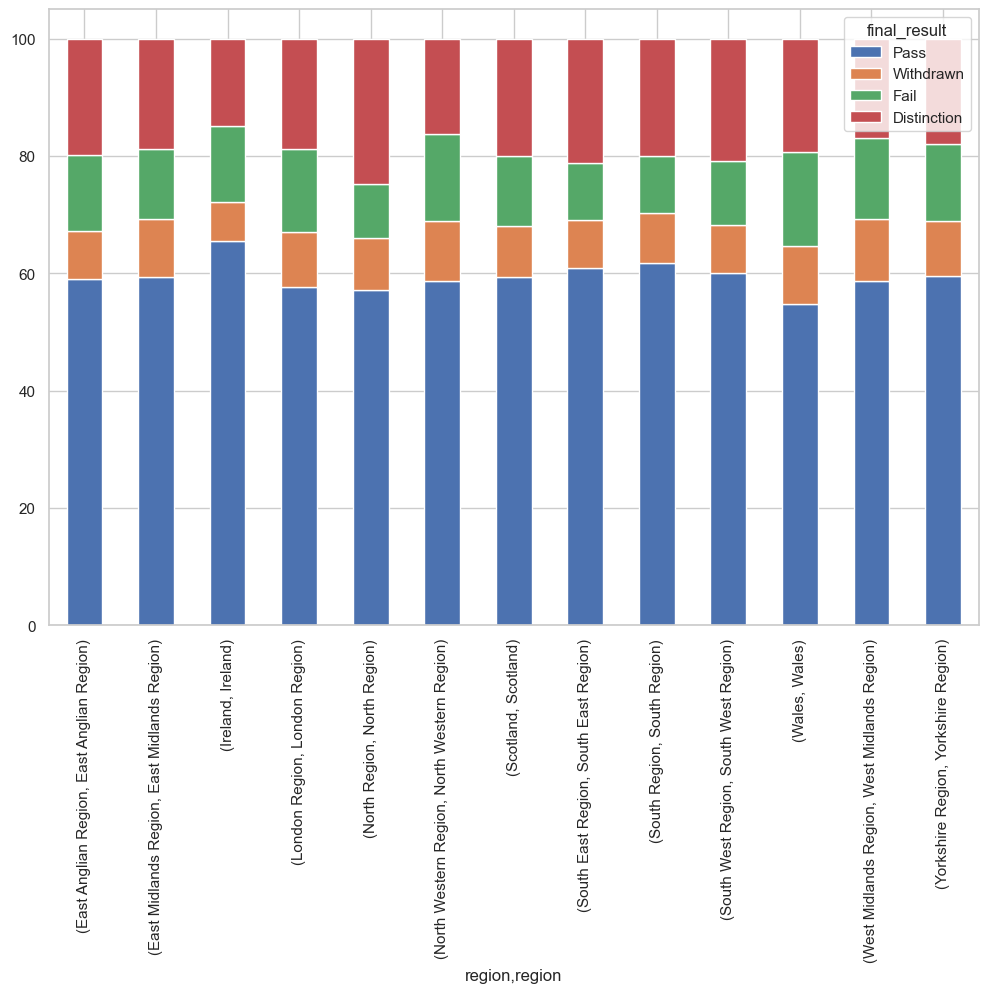

In [ ]:
pal = sns.color_palette("deep")
grouped = final_student.groupby(['region', 'final_result'])['id_student'].count()
grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
grouped = grouped.unstack('final_result').fillna(0)
print(grouped)
unique_list = list(final_student['final_result'].unique())
grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=(12, 8))

Dari stacke plot antara 'region', 'final_result', dan 'id_student' tersebut bertujuan untuk menampilkan pengaruh daerah asal atau lingkungan hidup terhadap kelulusan. Dari stacked plot tersebut didapatkan sebuah informasi bahwa :

Melalui stacked bar tersebut, kita dapat mengidentifikasi bahwa kelompok dengan pendidikan tingkat lebih rendah memiliki rasio pengunduran diri dan tingkat kegagalan yang signifikan lebih tinggi. Hal ini menunjukkan perbedaan yang mencolok dalam hasil akademik antara dua kelompok tersebut, di mana individu dengan pendidikan tingkat lebih rendah cenderung menghadapi kesulitan yang lebih besar dalam mencapai hasil yang sukses atau memadai. Analisis ini mencerminkan pentingnya faktor pendidikan dalam memengaruhi hasil akademik, dengan pendidikan tingkat atas lebih mungkin mempersiapkan individu untuk berhasil dalam lingkungan akademik.

final_result       Distinction       Fail       Pass  Withdrawn
imd_band imd_band                                              
0-10%    0-10%       12.878613  18.412286  56.243467  12.465634
10-20    10-20       13.105791  16.886718  59.474674  10.532816
20-30%   20-30%      16.388226  13.158849  58.645097  11.807827
30-40%   30-40%      18.719891  13.094015  59.615154   8.570940
40-50%   40-50%      18.660866  11.825344  59.999579   9.514211
50-60%   50-60%      19.818290  13.269201  58.533927   8.378582
60-70%   60-70%      20.020742  10.326617  60.834934   8.817707
70-80%   70-80%      21.365382  11.370586  59.184484   8.079548
80-90%   80-90%      21.402403   9.718319  61.515261   7.364016
90-100%  90-100%     26.338620   8.313597  58.925064   6.422719


<Axes: xlabel='imd_band,imd_band'>

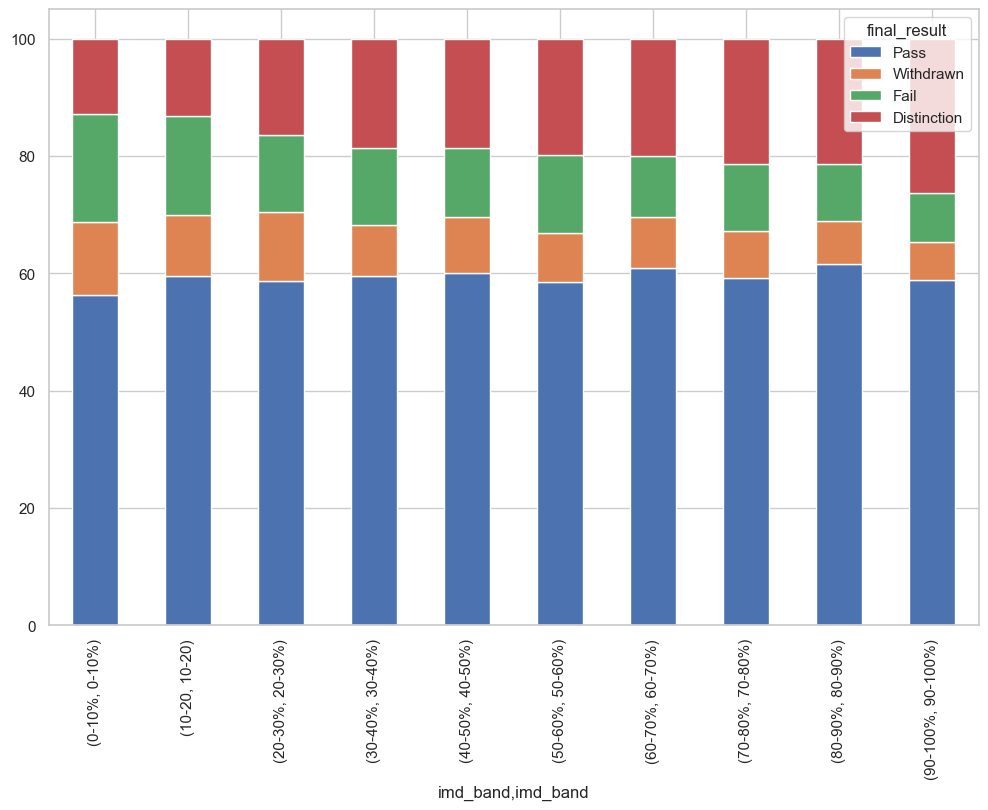

In [ ]:
pal = sns.color_palette("deep")
grouped = final_student.groupby(['imd_band', 'final_result'])['id_student'].count()
grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
grouped = grouped.unstack('final_result').fillna(0)
print(grouped)
unique_list = list(final_student['final_result'].unique())
grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=(12, 8))

Dari stacke plot antara 'imd_band', 'final_result', dan 'id_student' tersebut bertujuan untuk menampilkan pengaruh tingkat kemiskinan terhadap kelulusan. Dari stacked plot tersebut didapatkan sebuah informasi bahwa :

Melalui stacked bar tersebut, kita dapat mengidentifikasi bahwa rasio tingkat kegagalan dan pengunduran diri cenderung memiliki kesamaan yang signifikan, kecuali untuk kelompok IMD 0-20%, di mana persentase ini menunjukkan lonjakan yang lebih mencolok. Peningkatan ini mungkin mencerminkan bahwa individu dalam kelompok IMD 0-20% menghadapi tantangan yang lebih besar, atau ada faktor-faktor khusus yang memengaruhi hasil akademik mereka. Analisis IMD ini menunjukkan bahwa faktor-faktor sosioekonomi, seperti tingkat deprivasi, juga dapat memiliki dampak pada hasil akademik, dan perlu adanya perhatian khusus terhadap kelompok yang mungkin menghadapi hambatan ekstra dalam pendidikan mereka..

final_result   Distinction       Fail       Pass  Withdrawn
gender gender                                              
F      F         18.750218  12.059886  59.947131   9.242765
M      M         19.763935  12.467074  58.925991   8.843000


<Axes: xlabel='gender,gender'>

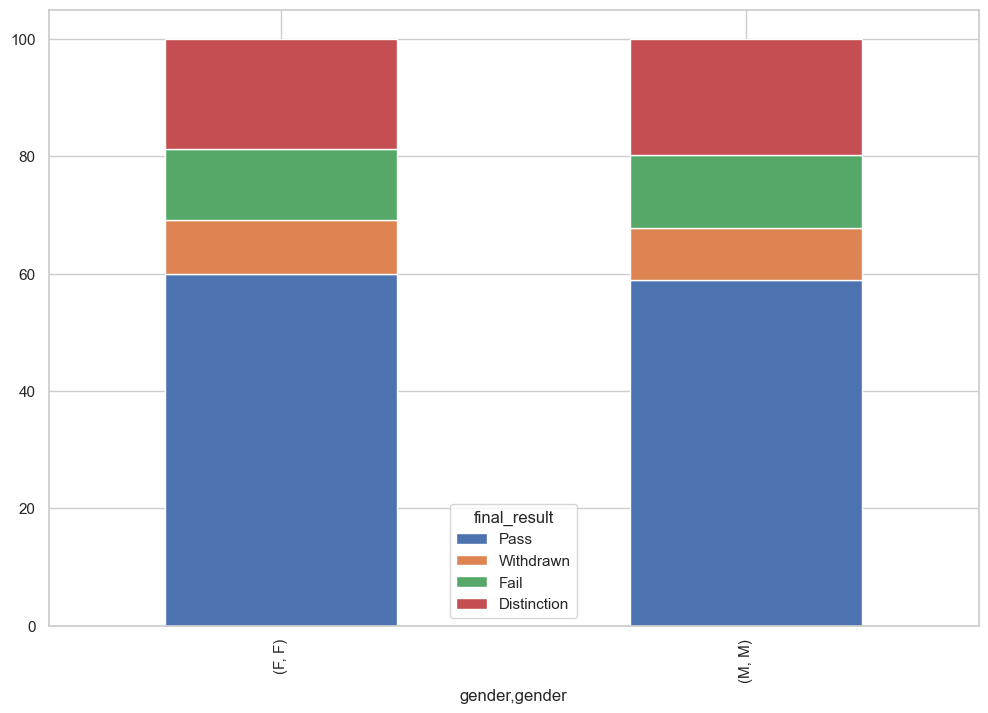

In [ ]:
pal = sns.color_palette("deep")
grouped = final_student.groupby(['gender', 'final_result'])['id_student'].count()
grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
grouped = grouped.unstack('final_result').fillna(0)
print(grouped)
unique_list = list(final_student['final_result'].unique())
grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=(12, 8))

Dari stacke plot antara 'gender', 'final_result', dan 'id_student' tersebut bertujuan untuk menampilkan pengaruh jenis kelamin terhadap kelulusan. Dari stacked plot tersebut didapatkan sebuah informasi bahwa :

Melalui stacked bar tersebut, kita dapat mengidentifikasi bahwa bahwa perbandingan rasio hasil akhir antara laki-laki dan perempuan tidak menunjukkan perbedaan yang signifikan. Ini mengindikasikan bahwa baik laki-laki maupun perempuan memiliki rasio hasil akhir yang relatif serupa untuk setiap kategori hasil akademik. Analisis ini menunjukkan bahwa jenis kelamin mungkin tidak menjadi faktor penentu utama dalam memengaruhi hasil akademik, dan bahwa faktor-faktor lain, seperti pendidikan, latar belakang sosioekonomi, atau motivasi individu, mungkin memiliki dampak yang lebih besar terhadap pencapaian akademik. Dengan demikian, analisis ini menggarisbawahi pentingnya mempertimbangkan faktor-faktor lain selain jenis kelamin dalam rangka meningkatkan hasil pendidikan.

final_result           Distinction       Fail       Pass  Withdrawn
disability disability                                              
N          N             19.658078  12.118194  59.804484   8.419244
Y          Y             16.314342  14.383852  54.080575  15.221231


<Axes: xlabel='disability,disability'>

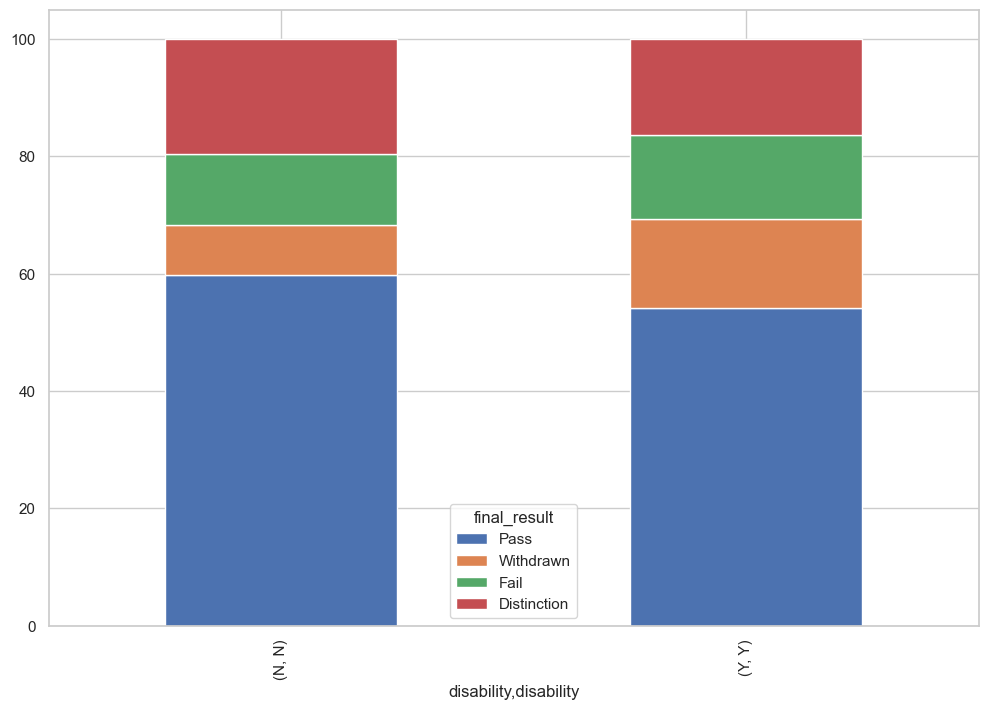

In [ ]:
pal = sns.color_palette("deep")
grouped = final_student.groupby(['disability', 'final_result'])['id_student'].count()
grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
grouped = grouped.unstack('final_result').fillna(0)
print(grouped)
unique_list = list(final_student['final_result'].unique())
grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=(12, 8))

Dari stacke plot antara 'disability', 'final_result', dan 'id_student' tersebut bertujuan untuk menampilkan pengaruh disabilitas terhadap kelulusan. Dari stacked plot tersebut didapatkan sebuah informasi bahwa :

Melalui stacked bar tersebut, kita dapat mengidentifikasi bahwa tingkat pengunduran diri cenderung lebih tinggi di antara siswa yang memiliki disabilitas. Hal ini menggambarkan tantangan tambahan yang dihadapi oleh siswa dengan disabilitas dalam mencapai kelulusan atau menjalani pendidikan yang sukses. Analisis ini menyoroti pentingnya penyediaan dukungan khusus dan sumber daya yang sesuai untuk siswa dengan disabilitas, serta perluasan akses mereka ke pendidikan yang inklusif. Tingkat pengunduran diri yang lebih tinggi di antara kelompok ini juga dapat mencerminkan pentingnya advokasi untuk penyelarasan kebijakan pendidikan yang lebih inklusif dan mendukung semua siswa, tanpa memandang status disabilitas mereka, untuk mencapai hasil pendidikan yang setara.

final_result                               Distinction       Fail       Pass   
num_of_prev_attempts num_of_prev_attempts                                      
0                    0                       20.280652  11.396905  59.669725  \
1                    1                       11.777832  19.480844  56.596650   
2                    2                        9.156117  25.749018  51.869438   
3                    3                        1.973395  33.615627  54.799664   
4                    4                        0.000000  16.525305  79.625315   
5                    5                        0.000000  40.507614  49.035533   
6                    6                       21.710526  18.092105   0.000000   

final_result                               Withdrawn  
num_of_prev_attempts num_of_prev_attempts             
0                    0                      8.652719  
1                    1                     12.144675  
2                    2                     13.225427  
3   

<Axes: xlabel='num_of_prev_attempts,num_of_prev_attempts'>

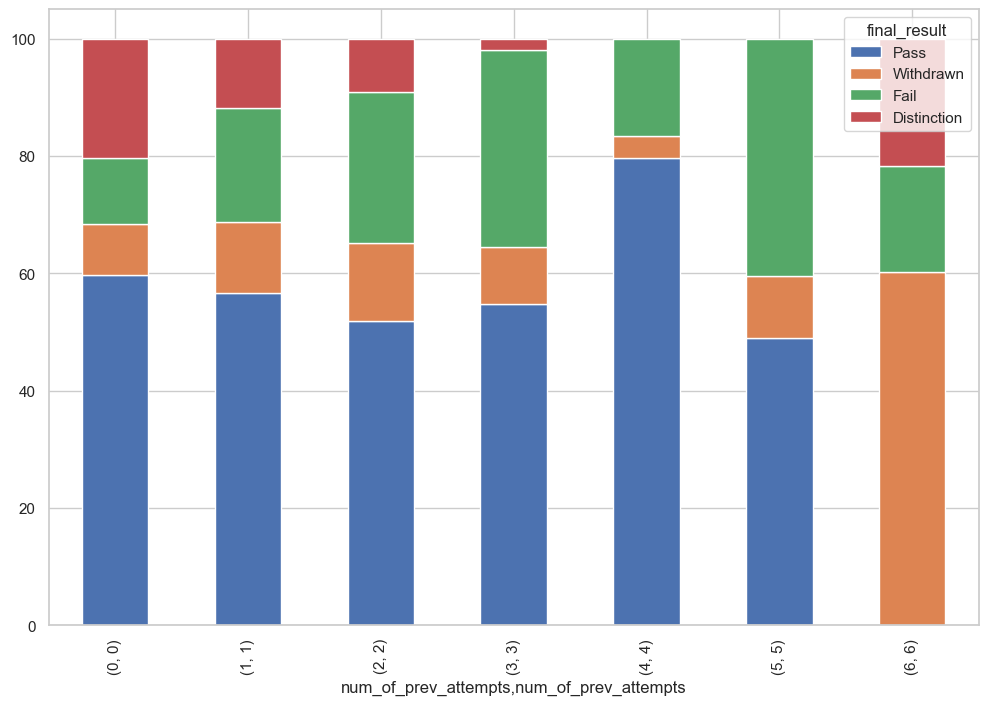

In [ ]:
pal = sns.color_palette("deep")
grouped = final_student.groupby(['num_of_prev_attempts', 'final_result'])['id_student'].count()
grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
grouped = grouped.unstack('final_result').fillna(0)
print(grouped)
unique_list = list(final_student['final_result'].unique())
grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=(12, 8))

Dari stacke plot antara 'num_of_prev_attempts', 'final_result', dan 'id_student' tersebut bertujuan untuk menampilkan pengaruh percobaan siswa pada modul terhadap kelulusan. Dari stacked plot tersebut didapatkan sebuah informasi bahwa :

Melalui stacked bar tersebut, kita dapat mengidentifikasi bahwa tingkat kegagalan dan penarikan diri mencapai tingkat terendah pada siswa yang memiliki catatan ketiadaan kursus sebelumnya atau yang belum pernah melakukan percobaan sebelumnya atau "0". Hal ini mengindikasikan bahwa siswa dengan pengalaman awal yang minim atau yang baru memulai perjalanan akademik mereka cenderung memiliki hasil yang lebih baik dalam hal tingkat kegagalan dan penarikan diri. Analisis ini mencerminkan pentingnya memahami bahwa beberapa siswa mungkin memulai perjalanan akademik mereka dengan keyakinan yang tinggi atau kesempatan yang lebih baik untuk berhasil, sementara mereka yang memiliki catatan kursus sebelumnya mungkin menghadapi tantangan tambahan. Fokus pada siswa yang baru memulai perjalanan mereka dalam pendidikan dapat memberikan wawasan penting untuk memahami faktor-faktor yang memengaruhi hasil akademik mereka.

# **PREPROCESSING and DATA SPLIT** 

In [92]:
final_student.dropna()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click,activity_type,date_unregistration,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,16.0,oucontent,0.0,268
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,44.0,oucontent,0.0,268
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,1.0,forumng,0.0,268
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,2.0,oucontent,0.0,268
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-5.0,1.0,forumng,0.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10658640,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,205.0,13.0,oucontent,0.0,269
10658641,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,205.0,2.0,oucontent,0.0,269
10658642,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,219.0,1.0,homepage,0.0,269
10658643,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,219.0,31.0,oucontent,0.0,269


**LABEL ENCODER**

In [93]:
le = LabelEncoder()

for column in final_student.columns:
    if final_student[column].dtype == 'object':
        final_student[column] = le.fit_transform(final_student[column])
final_student.dtypes

code_module                     int32
code_presentation               int32
id_student                      int64
gender                          int32
region                          int32
highest_education               int32
imd_band                        int32
age_band                        int32
num_of_prev_attempts            int64
studied_credits                 int64
disability                      int32
final_result                    int32
date                          float64
sum_click                     float64
activity_type                   int32
date_unregistration           float64
module_presentation_length      int64
dtype: object

**DATA SPLITTING**

In [94]:
X = final_student.drop('final_result', axis = 1)
y = final_student['final_result']

In [95]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**NORMALIZATION**

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
# Encode the target labels into one-hot vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)

In [99]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(50, activation='tanh'))
model.add(tf.keras.layers.Dense(20, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation='tanh'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [100]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1048, validation_split=0.3)

Epoch 1/50
4984/4984 [==============================] - 12s 2ms/step - loss: 0.7940 - accuracy: 0.6762 - val_loss: 0.7662 - val_accuracy: 0.6845
Epoch 2/50
4984/4984 [==============================] - 11s 2ms/step - loss: 0.7585 - accuracy: 0.6870 - val_loss: 0.7458 - val_accuracy: 0.6919
Epoch 3/50
4984/4984 [==============================] - 12s 2ms/step - loss: 0.7403 - accuracy: 0.6940 - val_loss: 0.7305 - val_accuracy: 0.6965
Epoch 4/50
4984/4984 [==============================] - 11s 2ms/step - loss: 0.7266 - accuracy: 0.6991 - val_loss: 0.7142 - val_accuracy: 0.7035
Epoch 5/50
4984/4984 [==============================] - 12s 2ms/step - loss: 0.7123 - accuracy: 0.7044 - val_loss: 0.7014 - val_accuracy: 0.7096
Epoch 6/50
4984/4984 [==============================] - 11s 2ms/step - loss: 0.7005 - accuracy: 0.7098 - val_loss: 0.6896 - val_accuracy: 0.7161
Epoch 7/50
4984/4984 [==============================] - 12s 2ms/step - loss: 0.6864 - accuracy: 0.7169 - val_loss: 0.6820 - val_ac

In [102]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

99925/99925 [==============================] - 69s 688us/step


In [103]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76    619356
           1       0.80      0.32      0.46    393741
           2       0.81      0.95      0.87   1897279
           3       1.00      0.97      0.98    287218

    accuracy                           0.83   3197594
   macro avg       0.86      0.74      0.77   3197594
weighted avg       0.83      0.83      0.81   3197594



In [104]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 439521    4839  174864     132]
 [  22522  127672  243057     490]
 [  75471   26123 1795397     288]
 [    942    1202    7127  277947]]


In [105]:
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.8257887023806024


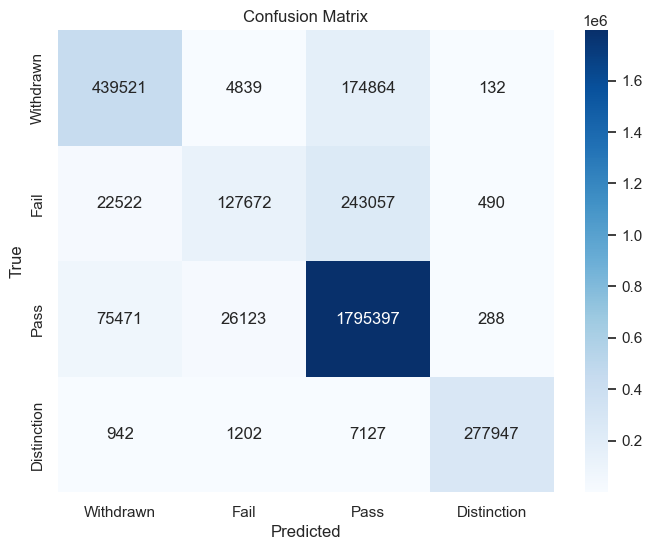

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Withdrawn', 'Fail', 'Pass', 'Distinction'], yticklabels=['Withdrawn', 'Fail', 'Pass', 'Distinction'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()